In [ ]:
## variables which look "interesting" for some reason
## e.g. Bayesian Belief Networks suggest a surprise causal link

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [7]:
dataset_name = "W13_comb"

In [8]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
dataset_description = manifest["Friendlier_Description"].values[0]
dataset_citation = manifest["Citation"].values[0]
dataset_start = manifest["Date_Start"].values[0]
dataset_stop = manifest["Date_Stop"].values[0]
dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

BES_Panel (69486, 5173)
BES_numeric (69486, 4993)
var_type (5173, 13)
BES_non_numeric (69486, 125)
BES_reduced (69486, 2526)
BES_reduced_with_na (69486, 2526)
Wall time: 18min 40s


In [9]:
output_subfolder = BES_output_folder + os.sep + dataset_name + os.sep + "Looking_at_interesting_variable_pairs" + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [15]:
[x for x in BES_reduced.columns if "sexuality" in x.lower()]

['xsexuality_Gay or lesbian', 'xsexuality_Bisexual']

In [21]:
BES_Panel['xsexuality'].value_counts()

Heterosexual         26865
Prefer not to say     1152
Gay or lesbian        1108
Bisexual               916
Other                  278
Name: xsexuality, dtype: int64

In [17]:
BES_reduced.corrwith(BES_reduced["xsexuality_Gay or lesbian"]).sort_values()

gayEquality__Gone much too far                             -0.139901
al4__Strongly agree                                        -0.115115
al_scale__Authoritarian                                    -0.091963
gender_Female                                              -0.089742
ageGroup__66+                                              -0.078770
euPriorityBalance__Control immigration                     -0.073094
al2__Strongly agree                                        -0.071782
blackEquality__Gone much too far                           -0.070634
xprofile_household_size__8 or more                         -0.067993
al5__Strongly agree                                        -0.066703
ukCoopMovement__Bad for Britain                            -0.065469
EUIntegrationSelf__Protect our independence                -0.065133
immigrantsWelfareState__Strongly agree                     -0.063917
profile_household_size__8 or more                          -0.063473
overseasAid__Strongly agree       

In [19]:
BES_reduced.corrwith(BES_reduced['xsexuality_Bisexual']).sort_values()

al_scale__Authoritarian                              -0.113614
al4__Strongly agree                                  -0.112892
al1__Strongly agree                                  -0.107991
gayEquality__Gone much too far                       -0.106831
al3__Strongly agree                                  -0.104345
ethno2__Strongly agree                               -0.086422
leftRight__Right                                     -0.085722
ageGroup__66+                                        -0.084930
blackEquality__Gone much too far                     -0.083668
al5__Strongly agree                                  -0.083178
ethno4__Strongly agree                               -0.081590
likeMay__Strongly like                               -0.079160
discrimWhite__A lot of discrimination against        -0.075611
immigrantsWelfareState__Strongly agree               -0.074021
EUIntegrationSelf__Protect our independence          -0.072896
likeCon__Strongly like                               -0

In [22]:
BES_reduced.corrwith(BES_Panel['xsexuality']=="Other").sort_values()

al3__Strongly agree                                                                 -0.074395
al_scale__Authoritarian                                                             -0.067900
al1__Strongly agree                                                                 -0.065267
al5__Strongly agree                                                                 -0.059929
ageGroup__66+                                                                       -0.055059
al4__Strongly agree                                                                 -0.054829
blackEquality__Gone much too far                                                    -0.054384
ethno2__Strongly agree                                                              -0.053208
gayEquality__Gone much too far                                                      -0.051663
ethno5__Strongly agree                                                              -0.050127
ethno4__Strongly agree                                      

In [102]:
BES_Panel['generalElectionVoteW13'].value_counts()

Conservative                                11295
Labour                                      10899
Liberal Democrat                             2667
Scottish National Party (SNP)                1364
United Kingdom Independence Party (UKIP)      754
Green Party                                   608
Other                                         361
Plaid Cymru                                   196
Don't know                                    168
Name: generalElectionVoteW13, dtype: int64

In [63]:
OldEnough = BES_Panel['Age']>=30

In [64]:
[x for x in BES_Panel.columns if "Age" in x]

['Age']

In [105]:
Labour2005 = BES_Panel['profile_past_vote_2005']=="Labour Party"
Labour2010 = BES_Panel['profile_past_vote_2010']=="Labour Party"
Labour2015 = BES_Panel['profile_past_vote_2015']=="Labour"
Labour2017 = BES_Panel['generalElectionVoteW13']=="Labour"

Conservative2005 = BES_Panel['profile_past_vote_2005']=="Conservative Party"
Conservative2010 = BES_Panel['profile_past_vote_2010']=="Conservative Party"
Conservative2015 = BES_Panel['profile_past_vote_2015']=="Conservative"
Conservative2017 = BES_Panel['generalElectionVoteW13']=="Conservative"


weights = BES_Panel['wt_new_W13']


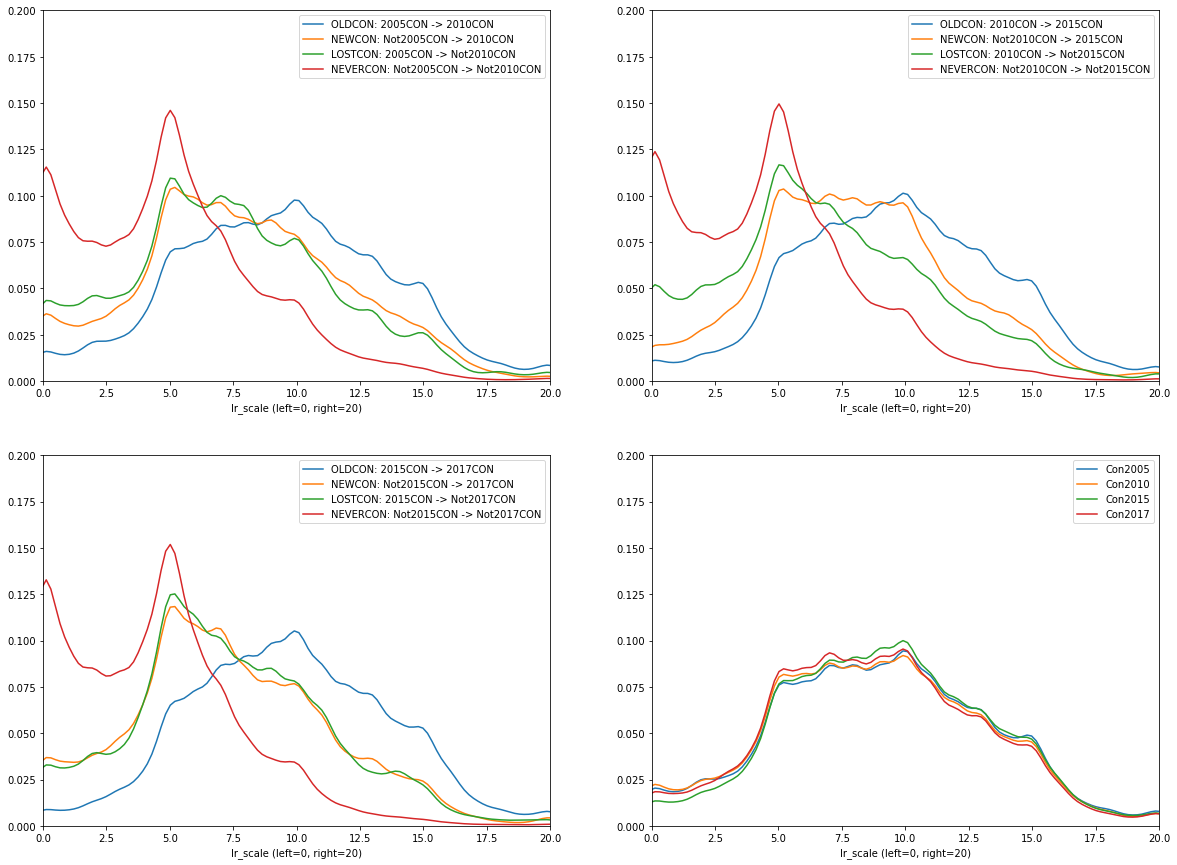

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

var = "lr_scaleW13"
label_dict = {"lr_scaleW13":"lr_scale (left=0, right=20)",
              "al_scaleW13":"al_scale (lib=0, auth=20)"}
title_dict = {"lr_scaleW13":"Lazy unweighted histogram of Old/New Conservative voters\n(economic left-right scale)",
              "al_scaleW13":"Lazy unweighted histogram of Old/New Conservative voters\n(social con-lib scale)"}

Con2005 = BES_Panel[Conservative2005][var].cat.codes.replace(-1,np.nan).dropna()
Con2010 = BES_Panel[Conservative2010][var].cat.codes.replace(-1,np.nan).dropna()
Con2015 = BES_Panel[Conservative2015][var].cat.codes.replace(-1,np.nan).dropna()
Con2017 = BES_Panel[Conservative2017][var].cat.codes.replace(-1,np.nan).dropna()

ax = ax=axes[1,1]
sns.kdeplot(Con2005, label="Con2005", bw=.5, ax=ax);
sns.kdeplot(Con2010, label="Con2010", bw=.5, ax=ax);
sns.kdeplot(Con2015, label="Con2015", bw=.5, ax=ax);
sns.kdeplot(Con2017, label="Con2017", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);

OldCon = BES_Panel[   Conservative2005 &  Conservative2010][var].cat.codes.replace(-1,np.nan)
NewCon = BES_Panel[  ~Conservative2005 &  Conservative2010][var].cat.codes.replace(-1,np.nan)
OnceCon = BES_Panel[  Conservative2005 & ~Conservative2010][var].cat.codes.replace(-1,np.nan)
NeverCon = BES_Panel[~Conservative2005 & ~Conservative2010][var].cat.codes.replace(-1,np.nan)


ax = ax=axes[0,0]
sns.kdeplot(OldCon.dropna(),  label="OLDCON: 2005CON -> 2010CON", bw=.5, ax=ax);
sns.kdeplot(NewCon.dropna(),  label="NEWCON: Not2005CON -> 2010CON", bw=.5, ax=ax);
sns.kdeplot(OnceCon.dropna(), label="LOSTCON: 2005CON -> Not2010CON", bw=.5, ax=ax);
sns.kdeplot(NeverCon.dropna(),label="NEVERCON: Not2005CON -> Not2010CON", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);



OldCon = BES_Panel[   Conservative2010 &  Conservative2015][var].cat.codes.replace(-1,np.nan)
NewCon = BES_Panel[  ~Conservative2010 &  Conservative2015][var].cat.codes.replace(-1,np.nan)
OnceCon = BES_Panel[  Conservative2010 & ~Conservative2015][var].cat.codes.replace(-1,np.nan)
NeverCon = BES_Panel[~Conservative2010 & ~Conservative2015][var].cat.codes.replace(-1,np.nan)


ax = ax=axes[0,1]
sns.kdeplot(OldCon.dropna(),  label="OLDCON: 2010CON -> 2015CON", bw=.5, ax = ax);
sns.kdeplot(NewCon.dropna(),  label="NEWCON: Not2010CON -> 2015CON", bw=.5, ax = ax);
sns.kdeplot(OnceCon.dropna(), label="LOSTCON: 2010CON -> Not2015CON", bw=.5, ax = ax);
sns.kdeplot(NeverCon.dropna(),label="NEVERCON: Not2010CON -> Not2015CON", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);


OldCon = BES_Panel[Conservative2015 & Conservative2017][var].cat.codes.replace(-1,np.nan)
NewCon = BES_Panel[~Conservative2015 & Conservative2017][var].cat.codes.replace(-1,np.nan)
OnceCon = BES_Panel[Conservative2015 & ~Conservative2017][var].cat.codes.replace(-1,np.nan)
NeverCon = BES_Panel[~Conservative2015 & ~Conservative2017][var].cat.codes.replace(-1,np.nan)


ax = ax=axes[1,0]
sns.kdeplot(OldCon.dropna(),  label="OLDCON: 2015CON -> 2017CON", bw=.5, ax = ax);
sns.kdeplot(NewCon.dropna(),  label="NEWCON: Not2015CON -> 2017CON", bw=.5, ax = ax);
sns.kdeplot(OnceCon.dropna(), label="LOSTCON: 2015CON -> Not2017CON", bw=.5, ax = ax);
sns.kdeplot(NeverCon.dropna(),label="NEVERCON: Not2015CON -> Not2017CON", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_Conservative_voters_lr_vars_all_plots" + ".png"
plt.savefig( fname, bbox_inches='tight' )

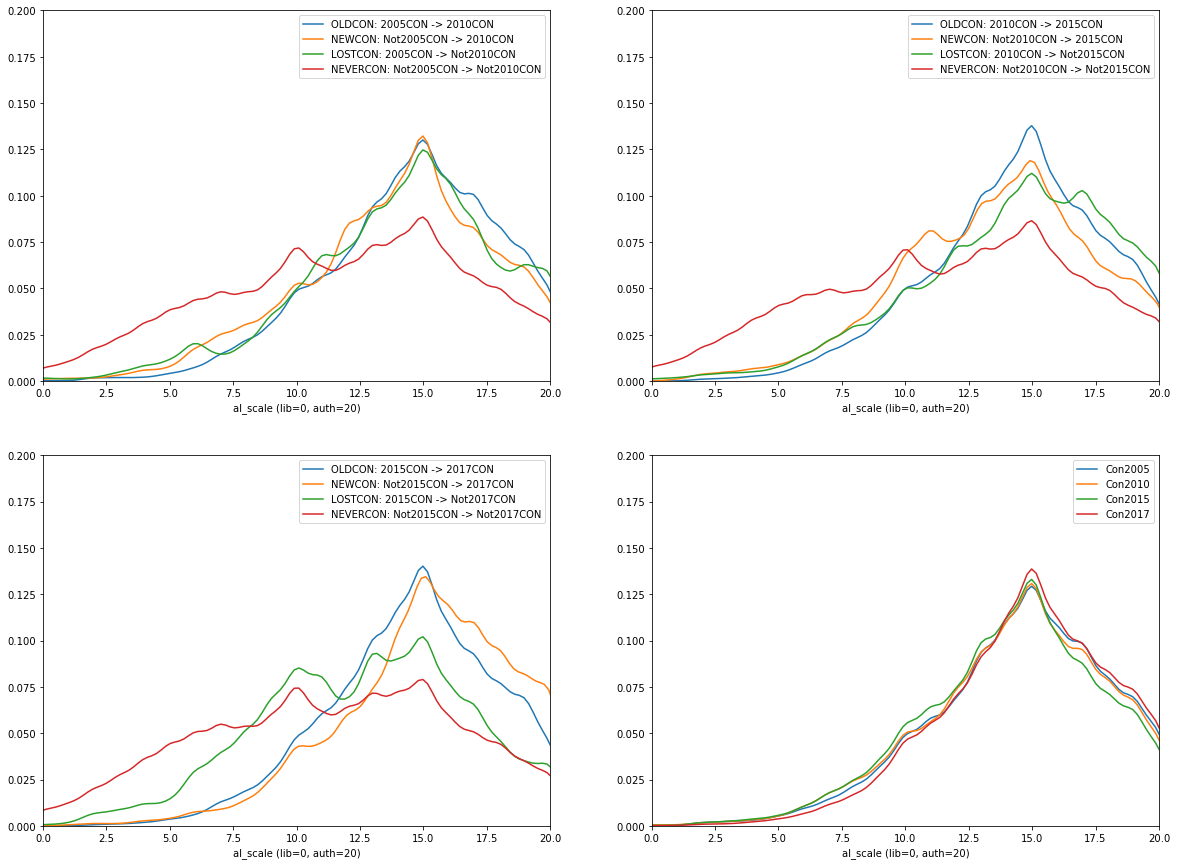

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

var = "al_scaleW13"
label_dict = {"lr_scaleW13":"lr_scale (left=0, right=20)",
              "al_scaleW13":"al_scale (lib=0, auth=20)"}
title_dict = {"lr_scaleW13":"Lazy unweighted histogram of Old/New Conservative voters\n(economic left-right scale)",
              "al_scaleW13":"Lazy unweighted histogram of Old/New Conservative voters\n(social con-lib scale)"}

Con2005 = BES_Panel[Conservative2005][var].cat.codes.replace(-1,np.nan).dropna()
Con2010 = BES_Panel[Conservative2010][var].cat.codes.replace(-1,np.nan).dropna()
Con2015 = BES_Panel[Conservative2015][var].cat.codes.replace(-1,np.nan).dropna()
Con2017 = BES_Panel[Conservative2017][var].cat.codes.replace(-1,np.nan).dropna()

ax = ax=axes[1,1]
sns.kdeplot(Con2005, label="Con2005", bw=.5, ax=ax);
sns.kdeplot(Con2010, label="Con2010", bw=.5, ax=ax);
sns.kdeplot(Con2015, label="Con2015", bw=.5, ax=ax);
sns.kdeplot(Con2017, label="Con2017", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);

OldCon = BES_Panel[   Conservative2005 &  Conservative2010][var].cat.codes.replace(-1,np.nan)
NewCon = BES_Panel[  ~Conservative2005 &  Conservative2010][var].cat.codes.replace(-1,np.nan)
OnceCon = BES_Panel[  Conservative2005 & ~Conservative2010][var].cat.codes.replace(-1,np.nan)
NeverCon = BES_Panel[~Conservative2005 & ~Conservative2010][var].cat.codes.replace(-1,np.nan)


ax = ax=axes[0,0]
sns.kdeplot(OldCon.dropna(),  label="OLDCON: 2005CON -> 2010CON", bw=.5, ax=ax);
sns.kdeplot(NewCon.dropna(),  label="NEWCON: Not2005CON -> 2010CON", bw=.5, ax=ax);
sns.kdeplot(OnceCon.dropna(), label="LOSTCON: 2005CON -> Not2010CON", bw=.5, ax=ax);
sns.kdeplot(NeverCon.dropna(),label="NEVERCON: Not2005CON -> Not2010CON", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);



OldCon = BES_Panel[   Conservative2010 &  Conservative2015][var].cat.codes.replace(-1,np.nan)
NewCon = BES_Panel[  ~Conservative2010 &  Conservative2015][var].cat.codes.replace(-1,np.nan)
OnceCon = BES_Panel[  Conservative2010 & ~Conservative2015][var].cat.codes.replace(-1,np.nan)
NeverCon = BES_Panel[~Conservative2010 & ~Conservative2015][var].cat.codes.replace(-1,np.nan)


ax = ax=axes[0,1]
sns.kdeplot(OldCon.dropna(),  label="OLDCON: 2010CON -> 2015CON", bw=.5, ax = ax);
sns.kdeplot(NewCon.dropna(),  label="NEWCON: Not2010CON -> 2015CON", bw=.5, ax = ax);
sns.kdeplot(OnceCon.dropna(), label="LOSTCON: 2010CON -> Not2015CON", bw=.5, ax = ax);
sns.kdeplot(NeverCon.dropna(),label="NEVERCON: Not2010CON -> Not2015CON", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);


OldCon = BES_Panel[Conservative2015 & Conservative2017][var].cat.codes.replace(-1,np.nan)
NewCon = BES_Panel[~Conservative2015 & Conservative2017][var].cat.codes.replace(-1,np.nan)
OnceCon = BES_Panel[Conservative2015 & ~Conservative2017][var].cat.codes.replace(-1,np.nan)
NeverCon = BES_Panel[~Conservative2015 & ~Conservative2017][var].cat.codes.replace(-1,np.nan)


ax = ax=axes[1,0]
sns.kdeplot(OldCon.dropna(),  label="OLDCON: 2015CON -> 2017CON", bw=.5, ax = ax);
sns.kdeplot(NewCon.dropna(),  label="NEWCON: Not2015CON -> 2017CON", bw=.5, ax = ax);
sns.kdeplot(OnceCon.dropna(), label="LOSTCON: 2015CON -> Not2017CON", bw=.5, ax = ax);
sns.kdeplot(NeverCon.dropna(),label="NEVERCON: Not2015CON -> Not2017CON", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_Conservative_voters_al_vars_all_plots" + ".png"
plt.savefig( fname, bbox_inches='tight' )

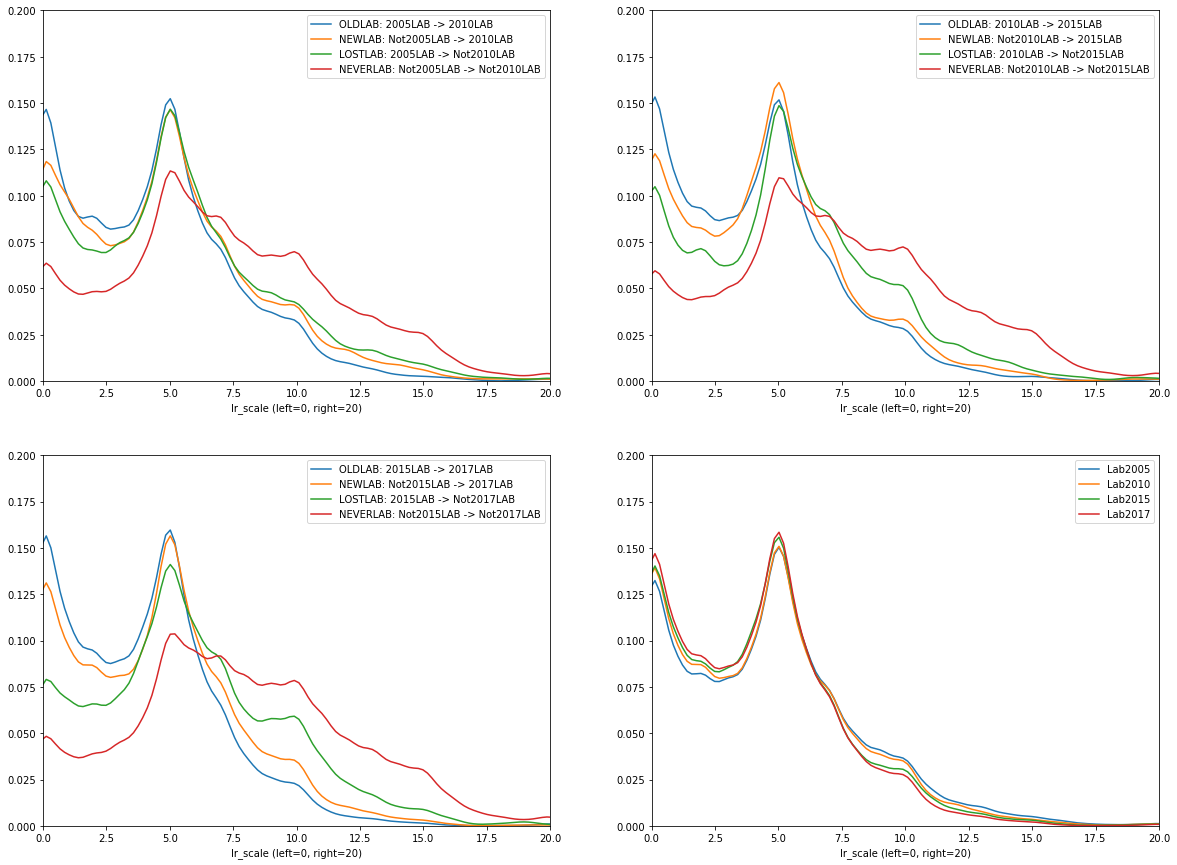

In [96]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

var = "lr_scaleW13"
label_dict = {"lr_scaleW13":"lr_scale (left=0, right=20)",
              "al_scaleW13":"al_scale (lib=0, auth=20)"}
title_dict = {"lr_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(economic left-right scale)",
              "al_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(social con-lib scale)"}

Lab2005 = BES_Panel[Labour2005][var].cat.codes.replace(-1,np.nan).dropna()
Lab2010 = BES_Panel[Labour2010][var].cat.codes.replace(-1,np.nan).dropna()
Lab2015 = BES_Panel[Labour2015][var].cat.codes.replace(-1,np.nan).dropna()
Lab2017 = BES_Panel[Labour2017][var].cat.codes.replace(-1,np.nan).dropna()

ax = ax=axes[1,1]
sns.kdeplot(Lab2005, label="Lab2005", bw=.5, ax=ax);
sns.kdeplot(Lab2010, label="Lab2010", bw=.5, ax=ax);
sns.kdeplot(Lab2015, label="Lab2015", bw=.5, ax=ax);
sns.kdeplot(Lab2017, label="Lab2017", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# plt.title(title_dict[var]);
# fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_lr_vars_2005_2010_2015_2017" + ".png"
# plt.savefig( fname, bbox_inches='tight' )

OldLab = BES_Panel[   Labour2005 &  Labour2010][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[  ~Labour2005 &  Labour2010][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[  Labour2005 & ~Labour2010][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2005 & ~Labour2010][var].cat.codes.replace(-1,np.nan)


# plt.figure(figsize=(10,5))
ax = ax=axes[0,0]
sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2005LAB -> 2010LAB", bw=.5, ax=ax);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2005LAB -> 2010LAB", bw=.5, ax=ax);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2005LAB -> Not2010LAB", bw=.5, ax=ax);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2005LAB -> Not2010LAB", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# plt.title(title_dict[var]);
# fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_lr_vars_2005_2010" + ".png"
# plt.savefig( fname, bbox_inches='tight' )


OldLab = BES_Panel[   Labour2010 &  Labour2015][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[  ~Labour2010 &  Labour2015][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[  Labour2010 & ~Labour2015][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2010 & ~Labour2015][var].cat.codes.replace(-1,np.nan)


# plt.figure(figsize=(10,5))
ax = ax=axes[0,1]
sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2010LAB -> 2015LAB", bw=.5, ax = ax);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2010LAB -> 2015LAB", bw=.5, ax = ax);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2010LAB -> Not2015LAB", bw=.5, ax = ax);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2010LAB -> Not2015LAB", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# ax.set_title(title_dict[var]);
# fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_lr_vars_2010_2015" + ".png"
# plt.savefig( fname, bbox_inches='tight' )

OldLab = BES_Panel[Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)


# plt.figure(figsize=(10,5))
ax = ax=axes[1,0]
sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2015LAB -> 2017LAB", bw=.5, ax = ax);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2015LAB -> 2017LAB", bw=.5, ax = ax);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2015LAB -> Not2017LAB", bw=.5, ax = ax);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2015LAB -> Not2017LAB", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# plt.title(title_dict[var]);
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_lr_vars_all_plots" + ".png"
plt.savefig( fname, bbox_inches='tight' )

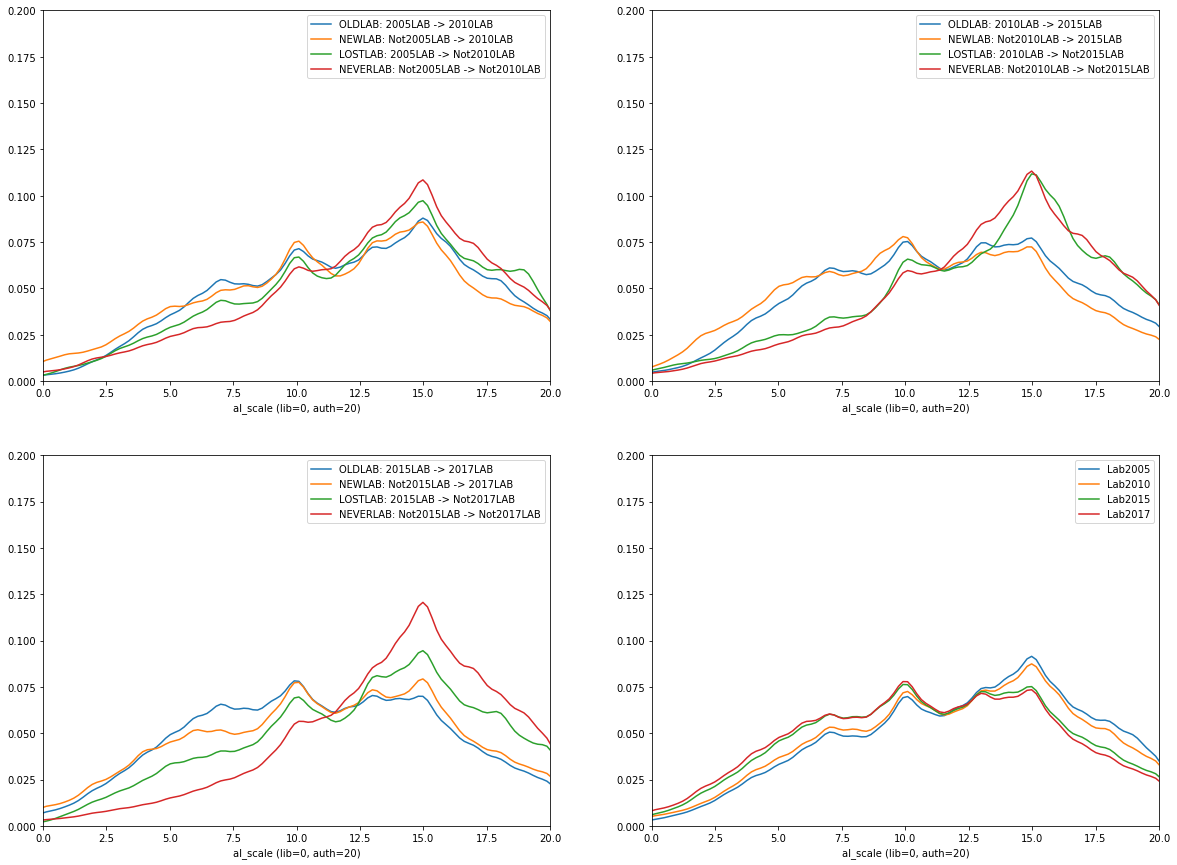

In [97]:
fig, axes = plt.subplots(2, 2, figsize=(20,15))

var = "al_scaleW13"
label_dict = {"lr_scaleW13":"lr_scale (left=0, right=20)",
              "al_scaleW13":"al_scale (lib=0, auth=20)"}
title_dict = {"lr_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(economic left-right scale)",
              "al_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(social con-lib scale)"}

Lab2005 = BES_Panel[Labour2005][var].cat.codes.replace(-1,np.nan).dropna()
Lab2010 = BES_Panel[Labour2010][var].cat.codes.replace(-1,np.nan).dropna()
Lab2015 = BES_Panel[Labour2015][var].cat.codes.replace(-1,np.nan).dropna()
Lab2017 = BES_Panel[Labour2017][var].cat.codes.replace(-1,np.nan).dropna()

ax = ax=axes[1,1]
sns.kdeplot(Lab2005, label="Lab2005", bw=.5, ax=ax);
sns.kdeplot(Lab2010, label="Lab2010", bw=.5, ax=ax);
sns.kdeplot(Lab2015, label="Lab2015", bw=.5, ax=ax);
sns.kdeplot(Lab2017, label="Lab2017", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# plt.title(title_dict[var]);
# fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_lr_vars_2005_2010_2015_2017" + ".png"
# plt.savefig( fname, bbox_inches='tight' )

OldLab = BES_Panel[   Labour2005 &  Labour2010][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[  ~Labour2005 &  Labour2010][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[  Labour2005 & ~Labour2010][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2005 & ~Labour2010][var].cat.codes.replace(-1,np.nan)


# plt.figure(figsize=(10,5))
ax = ax=axes[0,0]
sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2005LAB -> 2010LAB", bw=.5, ax=ax);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2005LAB -> 2010LAB", bw=.5, ax=ax);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2005LAB -> Not2010LAB", bw=.5, ax=ax);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2005LAB -> Not2010LAB", bw=.5, ax=ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# plt.title(title_dict[var]);
# fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_lr_vars_2005_2010" + ".png"
# plt.savefig( fname, bbox_inches='tight' )


OldLab = BES_Panel[   Labour2010 &  Labour2015][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[  ~Labour2010 &  Labour2015][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[  Labour2010 & ~Labour2015][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2010 & ~Labour2015][var].cat.codes.replace(-1,np.nan)


# plt.figure(figsize=(10,5))
ax = ax=axes[0,1]
sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2010LAB -> 2015LAB", bw=.5, ax = ax);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2010LAB -> 2015LAB", bw=.5, ax = ax);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2010LAB -> Not2015LAB", bw=.5, ax = ax);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2010LAB -> Not2015LAB", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# ax.set_title(title_dict[var]);
# fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_lr_vars_2010_2015" + ".png"
# plt.savefig( fname, bbox_inches='tight' )

OldLab = BES_Panel[Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)


# plt.figure(figsize=(10,5))
ax = ax=axes[1,0]
sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2015LAB -> 2017LAB", bw=.5, ax = ax);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2015LAB -> 2017LAB", bw=.5, ax = ax);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2015LAB -> Not2017LAB", bw=.5, ax = ax);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2015LAB -> Not2017LAB", bw=.5, ax = ax);

ax.set_ylim([0,.2])
ax.set_xlim([0,20])
ax.set_xlabel(label_dict[var]);
# plt.title(title_dict[var]);
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_al_vars_all_plots" + ".png"
plt.savefig( fname, bbox_inches='tight' )

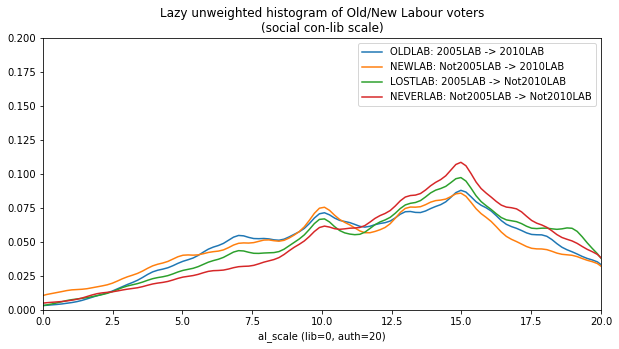

In [76]:
var = "al_scaleW13"
label_dict = {"lr_scaleW13":"lr_scale (left=0, right=20)",
              "al_scaleW13":"al_scale (lib=0, auth=20)"}
title_dict = {"lr_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(economic left-right scale)",
              "al_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(social con-lib scale)"}

OldLab = BES_Panel[   Labour2005 &  Labour2010][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[  ~Labour2005 &  Labour2010][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[  Labour2005 & ~Labour2010][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2005 & ~Labour2010][var].cat.codes.replace(-1,np.nan)


plt.figure(figsize=(10,5))

sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2005LAB -> 2010LAB",bw=.5);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2005LAB -> 2010LAB",bw=.5);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2005LAB -> Not2010LAB",bw=.5);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2005LAB -> Not2010LAB",bw=.5);

plt.ylim([0,.2])
plt.xlim([0,20])
plt.xlabel(label_dict[var]);
plt.title(title_dict[var]);
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_al_vars_2005_2010" + ".png"
plt.savefig( fname, bbox_inches='tight' )

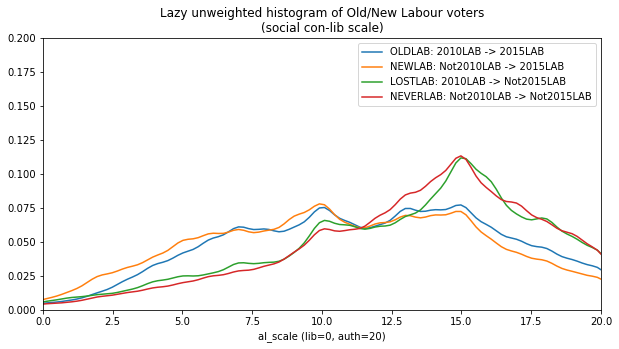

In [75]:
var = "al_scaleW13"
label_dict = {"lr_scaleW13":"lr_scale (left=0, right=20)",
              "al_scaleW13":"al_scale (lib=0, auth=20)"}
title_dict = {"lr_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(economic left-right scale)",
              "al_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(social con-lib scale)"}

OldLab = BES_Panel[   Labour2010 &  Labour2015][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[  ~Labour2010 &  Labour2015][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[  Labour2010 & ~Labour2015][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2010 & ~Labour2015][var].cat.codes.replace(-1,np.nan)


plt.figure(figsize=(10,5))

sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2010LAB -> 2015LAB",bw=.5);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2010LAB -> 2015LAB",bw=.5);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2010LAB -> Not2015LAB",bw=.5);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2010LAB -> Not2015LAB",bw=.5);

plt.ylim([0,.2])
plt.xlim([0,20])
plt.xlabel(label_dict[var]);
plt.title(title_dict[var]);
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_al_vars_2010_2015" + ".png"
plt.savefig( fname, bbox_inches='tight' )

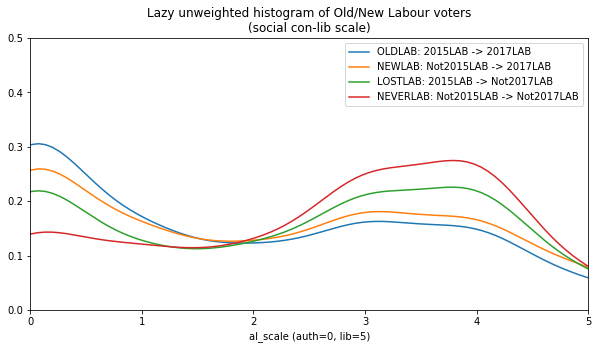

In [21]:
var = "al2W13"

OldLab = BES_Panel[Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)


plt.figure(figsize=(10,5))

sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2015LAB -> 2017LAB",bw=.5);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2015LAB -> 2017LAB",bw=.5);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2015LAB -> Not2017LAB",bw=.5);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2015LAB -> Not2017LAB",bw=.5);

plt.ylim([0,.5])
plt.xlim([0,5])
plt.xlabel("al_scale (auth=0, lib=5)");
plt.title("Lazy unweighted histogram of Old/New Labour voters\n(social con-lib scale)");
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_al_vars" + ".png"
plt.savefig( fname, bbox_inches='tight' )

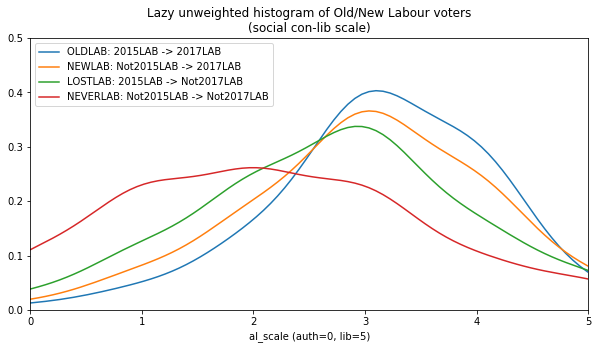

In [22]:
var = "lr1W13"

OldLab = BES_Panel[Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)


plt.figure(figsize=(10,5))

sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2015LAB -> 2017LAB",bw=.5);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2015LAB -> 2017LAB",bw=.5);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2015LAB -> Not2017LAB",bw=.5);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2015LAB -> Not2017LAB",bw=.5);

plt.ylim([0,.5])
plt.xlim([0,5])
plt.xlabel("al_scale (auth=0, lib=5)");
plt.title("Lazy unweighted histogram of Old/New Labour voters\n(social con-lib scale)");
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_al_vars" + ".png"
plt.savefig( fname, bbox_inches='tight' )

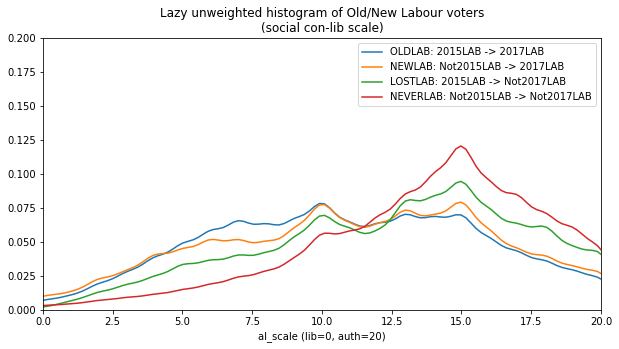

In [74]:
var = "al_scaleW13"
label_dict = {"lr_scaleW13":"lr_scale (left=0, right=20)",
              "al_scaleW13":"al_scale (lib=0, auth=20)"}
title_dict = {"lr_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(economic left-right scale)",
              "al_scaleW13":"Lazy unweighted histogram of Old/New Labour voters\n(social con-lib scale)"}

OldLab = BES_Panel[Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017][var].cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2015 & ~Labour2017][var].cat.codes.replace(-1,np.nan)


plt.figure(figsize=(10,5))

sns.kdeplot(OldLab.dropna(),  label="OLDLAB: 2015LAB -> 2017LAB",bw=.5);
sns.kdeplot(NewLab.dropna(),  label="NEWLAB: Not2015LAB -> 2017LAB",bw=.5);
sns.kdeplot(OnceLab.dropna(), label="LOSTLAB: 2015LAB -> Not2017LAB",bw=.5);
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2015LAB -> Not2017LAB",bw=.5);

plt.ylim([0,.2])
plt.xlim([0,20])
plt.xlabel(label_dict[var]);
plt.title(title_dict[var]);
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_al_vars_2015_2017" + ".png"
plt.savefig( fname, bbox_inches='tight' )

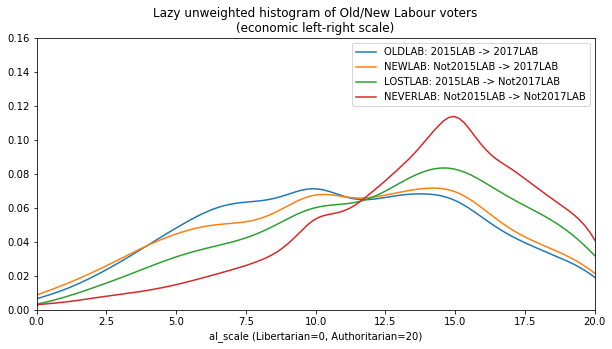

In [92]:
OldLab = BES_Panel[Labour2015 & Labour2017].al_scale.cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017].al_scale.cat.codes.replace(-1,np.nan)
OnceLab = BES_Panel[Labour2015 & ~Labour2017].al_scale.cat.codes.replace(-1,np.nan)
NeverLab = BES_Panel[~Labour2015 & ~Labour2017].al_scale.cat.codes.replace(-1,np.nan)

plt.figure(figsize=(10,5))

sns.kdeplot(OldLab.dropna(),label="OLDLAB: 2015LAB -> 2017LAB");
sns.kdeplot(NewLab.dropna(),label="NEWLAB: Not2015LAB -> 2017LAB");
sns.kdeplot(OnceLab.dropna(),label="LOSTLAB: 2015LAB -> Not2017LAB");
sns.kdeplot(NeverLab.dropna(),label="NEVERLAB: Not2015LAB -> Not2017LAB");

plt.xlim([0,20])
plt.ylim([0,.16])
plt.xlabel("al_scale (Libertarian=0, Authoritarian=20)");
plt.title("Lazy unweighted histogram of Old/New Labour voters\n(economic left-right scale)");
fname = output_subfolder + "Lazy_unweighted_histogram_old_new_labour_voters_al_scale" + ".png"
plt.savefig( fname, bbox_inches='tight' )

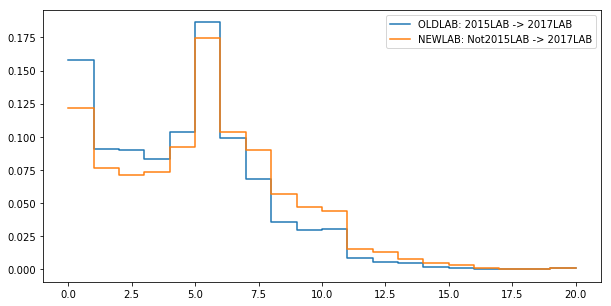

In [82]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

OldLab = BES_Panel[Labour2015 & Labour2017].lr_scale.cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017].lr_scale.cat.codes.replace(-1,np.nan)
# OnceLab = BES_Panel[Labour2015 & ~Labour2017].lr_scale.cat.codes.replace(-1,np.nan)
# NeverLab = BES_Panel[~Labour2015 & ~Labour2017].lr_scale.cat.codes.replace(-1,np.nan)


plt.figure(figsize=(10,5))

hist,bins = np.histogram(OldLab.dropna(), bins = bins, weights = weights.loc[OldLab.dropna().index], density=True)
plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps', label="OLDLAB: 2015LAB -> 2017LAB")

hist,bins = np.histogram(NewLab.dropna(), bins = bins, weights = weights.loc[NewLab.dropna().index], density=True)
plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps', label="NEWLAB: Not2015LAB -> 2017LAB")

# hist,bins = np.histogram(OnceLab.dropna(), bins = bins, weights = weights.loc[OnceLab.dropna().index], density=True)
# plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps', label="LOSTLAB: 2015LAB -> Not2017LAB")

# hist,bins = np.histogram(NeverLab.dropna(), bins = bins, weights = weights.loc[NeverLab.dropna().index], density=True)
# plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps', label="NEVERLAB: Not2015LAB -> Not2017LAB")

plt.legend()

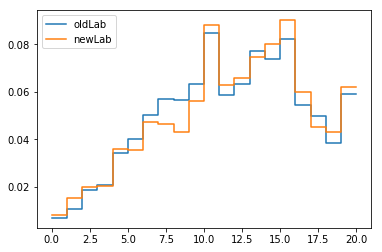

In [69]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

OldLab = BES_Panel[Labour2015 & Labour2017].al_scale.cat.codes.replace(-1,np.nan)
NewLab = BES_Panel[~Labour2015 & Labour2017].al_scale.cat.codes.replace(-1,np.nan)
# OnceLab = BES_Panel[Labour2015 & ~Labour2017].al_scale.cat.codes.replace(-1,np.nan)
# NeverLab = BES_Panel[~Labour2015 & ~Labour2017].al_scale.cat.codes.replace(-1,np.nan)

hist,bins = np.histogram(OldLab.dropna(), bins = bins, weights = weights.loc[OldLab.dropna().index], density=True)
plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps', label="oldLab")

hist,bins = np.histogram(NewLab.dropna(), bins = bins, weights = weights.loc[NewLab.dropna().index], density=True)
plt.plot(bins, np.insert(hist, 0, hist[0]), '-', drawstyle='steps', label="newLab")
plt.legend()

In [78]:
hist,bins = np.histogram(NeverLab.dropna(), bins = bins, weights = weights.loc[NeverLab.dropna().index], density=True)

In [81]:
weights.loc[NeverLab.dropna().index]

0        0.638969
3        0.940523
4        0.492335
6        0.835509
7        0.567729
8        0.994050
9        0.867012
11       1.267770
14       0.437162
16       0.484891
17       1.043440
18       0.743731
19       0.270096
20       0.412919
22       0.470591
24       0.311823
25       0.534494
29       0.960982
32       0.853447
35       0.768123
37       0.433264
38       0.537385
39       1.410660
43       1.106603
44       0.299418
45       1.099772
46       1.201242
47       1.207977
48       1.676080
49       0.509958
           ...   
31135    1.936296
31137    2.416784
31139    0.980672
31143    1.505137
31144    0.702730
31145    0.500139
31149    1.965020
31152    0.655727
31153    1.814285
31154    3.340095
31156    1.113377
31159    5.005306
31162    1.664260
31165    1.664260
31166    1.853577
31167    2.851928
31168    2.084912
31169    1.456182
31170    1.349601
31173    1.039775
31174    2.455203
31178    1.122285
31179    1.414594
31180    0.974051
31183    4

In [159]:
# 'partyMember__Yes, I am a member of a party' -> 'neverPrivSchoolW1W2W3W4W7W9_Yes'
BES_Panel["neverPrivSchoolW1W2W3W4W7W9"].value_counts()

Yes           24953
No             4721
Don't know      622
Name: neverPrivSchoolW1W2W3W4W7W9, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

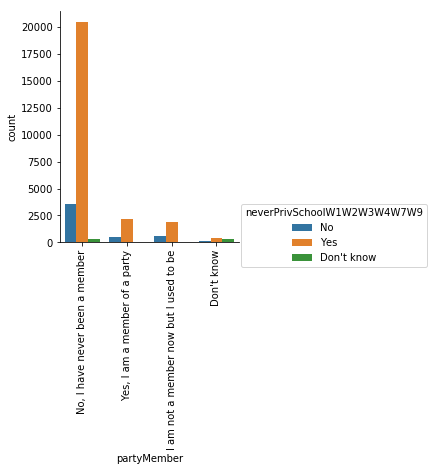

In [12]:
x = 'partyMember__Yes, I am a member of a party' 
hue = 'neverPrivSchoolW1W2W3W4W7W9_Yes'


# , col='IpsosAgeGroups',
sns.factorplot(x=new_old_col_names[x], hue=new_old_col_names[hue], data=BES_Panel, kind='count');
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

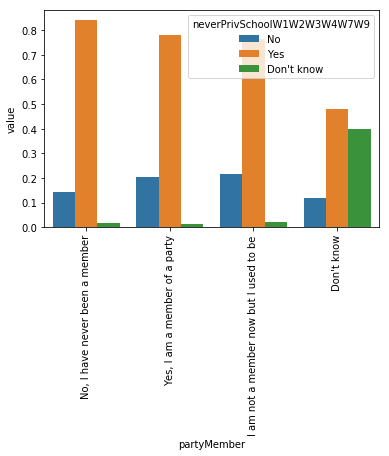

In [167]:
x = 'partyMember__Yes, I am a member of a party'
x = new_old_col_names[x]
y = 'neverPrivSchoolW1W2W3W4W7W9_Yes'
y = new_old_col_names[y]
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   
stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
stacked
sns.barplot(x=x, y='value', hue=y, data=stacked);
plt.xticks(rotation=90)

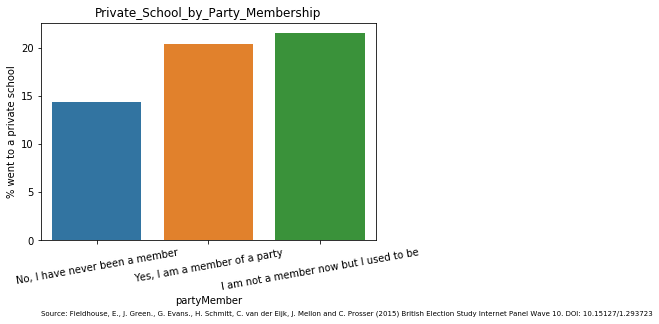

In [168]:
# fig, axes = plt.figure()
name = "Private_School_by_Party_Membership"
y_axis_name = '% went to a private school'
smaller_ct = crosstab.drop("Don't know",axis=0).drop("Don't know",axis=1).drop("Yes",axis=1)
stacked = smaller_ct.stack().reset_index().rename(columns={0:y_axis_name})
stacked[x] = stacked[x].cat.remove_categories("Don't know")
stacked[y_axis_name] = stacked[y_axis_name]*100
sns.barplot(x=x, y=y_axis_name, data=stacked);
plt.xticks(rotation=10);
ax = plt.gca()
dataset_citation = "Source: " + manifest["Citation"].values[0]
ax.annotate(dataset_citation, (0,0), (0, -70),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = output_subfolder + name + ".png"
plt.title(name)
plt.savefig( fname, bbox_inches='tight' )
# ax.legend_ = None
# plt.draw()

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

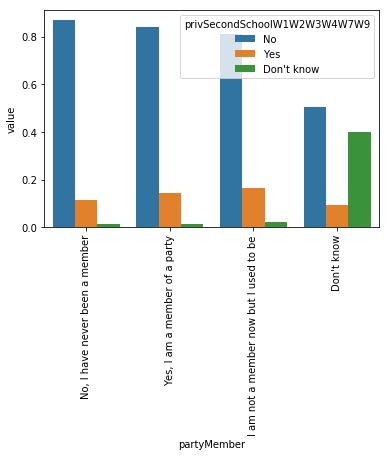

In [77]:
x = 'partyMember__Yes, I am a member of a party'
x = new_old_col_names[x]
y = 'privSecondSchoolW1W2W3W4W7W9_Yes'
y = new_old_col_names[y]

weights =   BES_Panel["wt_full_W10"]
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   
stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
stacked
sns.barplot(x=x, y='value', hue=y, data=stacked);
plt.xticks(rotation=90)

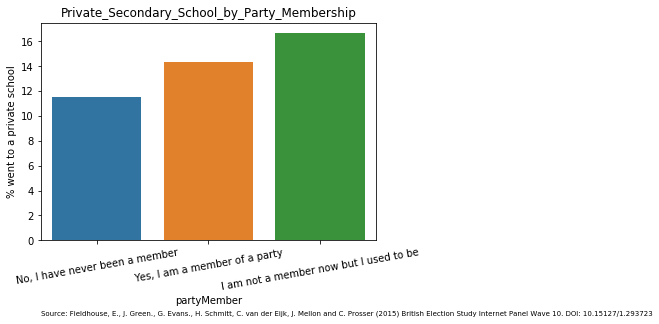

In [81]:
# fig, axes = plt.figure()
name = "Private_Secondary_School_by_Party_Membership"
y_axis_name = '% went to a private school'
smaller_ct = crosstab.drop("Don't know",axis=0).drop("Don't know",axis=1).drop("No",axis=1)
stacked = smaller_ct.stack().reset_index().rename(columns={0:y_axis_name})
stacked[x] = stacked[x].cat.remove_categories("Don't know")
stacked[y_axis_name] = stacked[y_axis_name]*100
sns.barplot(x=x, y=y_axis_name, data=stacked);
plt.xticks(rotation=10);
ax = plt.gca()
dataset_citation = "Source: " + manifest["Citation"].values[0]
ax.annotate(dataset_citation, (0,0), (0, -70),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = output_subfolder + name + ".png"
plt.title(name)
plt.savefig( fname, bbox_inches='tight' )
# ax.legend_ = None
# plt.draw()

In [86]:
BES_Panel["generalElectionVote"].cat.categories


Index(['I would not vote', 'Conservative', 'Labour', 'Liberal Democrat',
       'Scottish National Party (SNP)', 'Plaid Cymru',
       'United Kingdom Independence Party (UKIP)', 'Green Party', 'Other',
       'Don't know'],
      dtype='object')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

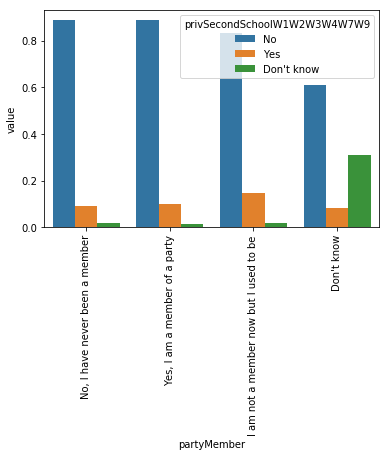

In [90]:
partyFilter = BES_Panel["generalElectionVote"]=='Labour'

x = 'partyMember__Yes, I am a member of a party'
x = new_old_col_names[x]
y = 'privSecondSchoolW1W2W3W4W7W9_Yes'
y = new_old_col_names[y]

weights =   BES_Panel["wt_full_W10"][partyFilter]
    
crosstab = pd.crosstab(BES_Panel[x][partyFilter],
            BES_Panel[y][partyFilter],
            normalize='index',
            values  = weights,
            aggfunc = sum)   
stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
stacked
sns.barplot(x=x, y='value', hue=y, data=stacked);
plt.xticks(rotation=90)

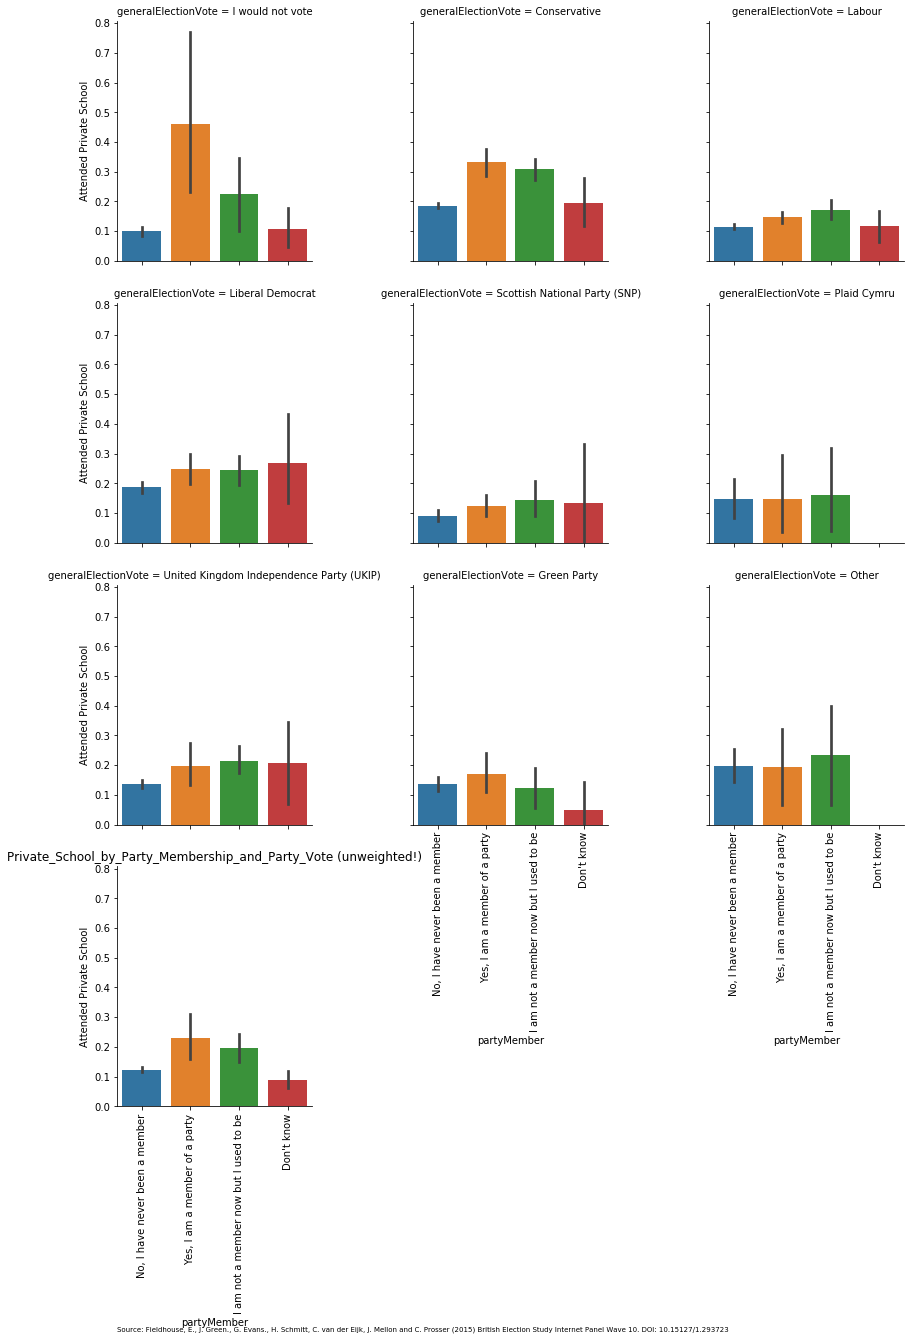

In [195]:
x = 'partyMember__Yes, I am a member of a party'
x = new_old_col_names[x]
y = 'neverPrivSchoolW1W2W3W4W7W9_Yes'
y = new_old_col_names[y]
party = "generalElectionVote"
# weights =   BES_Panel["wt_full_W10"]
BES_Panel["Attended Private School"] = (BES_Panel[y]=="No").astype('float')

# # tips["tip_and_weight"] = zip(tips.tip, tips.weight)
# BES_Panel["weighted_variable"] = zip((BES_Panel[y]=="Yes").astype('float'), weights)
# def weighted_mean(x, **kws):
#     val, weight = map(np.asarray, zip(*x))
#     return (val * weight).sum() / weight.sum()

# # g = sns.factorplot("size", "tip_and_weight", data=tips,
# #                    estimator=weighted_mean, orient="v")


# , col='IpsosAgeGroups',
g = sns.factorplot(x=x, col= party, y="Attended Private School", data=BES_Panel, kind='bar', col_wrap=3);
g.set_xticklabels(rotation=90)
name = "Private_School_by_Party_Membership_and_Party_Vote (unweighted!)"
ax = plt.gca()
dataset_citation = "Source: " + manifest["Citation"].values[0]
ax.annotate(dataset_citation, (0,0), (0, -220),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = output_subfolder + name + ".png"
plt.title(name)
plt.savefig( fname, bbox_inches='tight' )

(array([0, 1]), <a list of 2 Text xticklabel objects>)

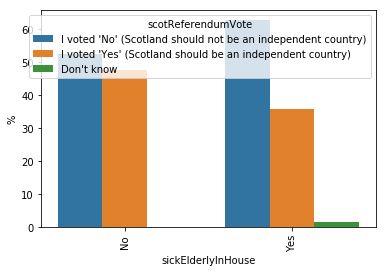

In [197]:
x = 'sickElderlyInHouse'
# x = new_old_col_names[x]
y = 'scotReferendumVote'
# y = new_old_col_names[y]
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   
stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
stacked["%"] = stacked["%"]*100
sns.barplot(x=x, y='%', hue=y, data=stacked);
plt.xticks(rotation=90)

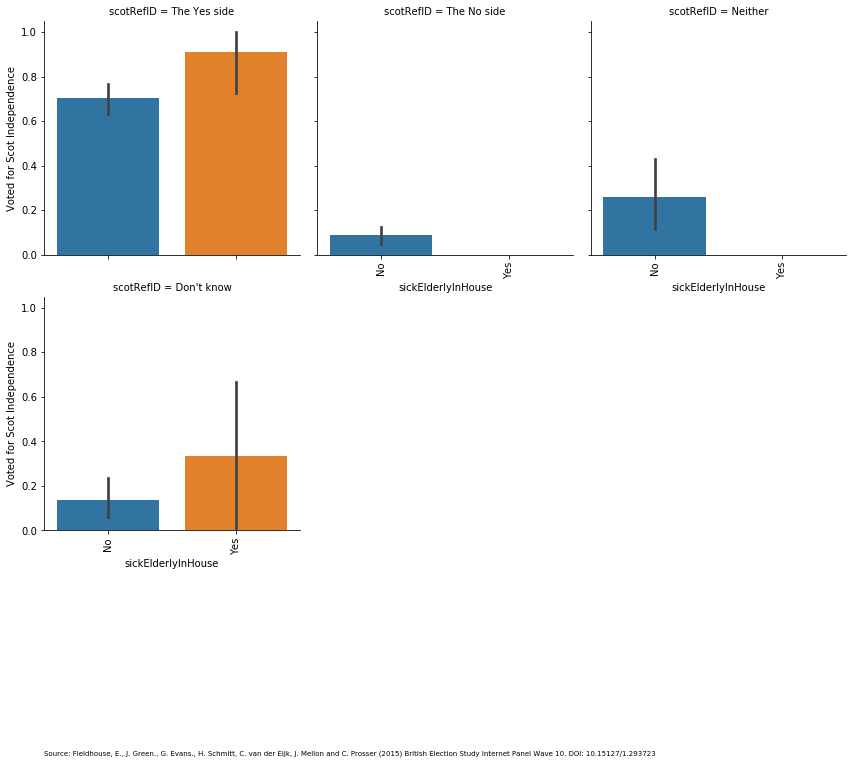

In [207]:
x = 'sickElderlyInHouse'
# x = new_old_col_names[x]
y = 'scotReferendumVote'
# y = new_old_col_names[y]
party = "scotRefID"
# weights =   BES_Panel["wt_full_W10"]
new_var = "Voted for Scot Independence"
BES_Panel[new_var] = (BES_Panel[y]==BES_Panel[y].cat.categories[1]).astype('float')

# # tips["tip_and_weight"] = zip(tips.tip, tips.weight)
# BES_Panel["weighted_variable"] = zip((BES_Panel[y]=="Yes").astype('float'), weights)
# def weighted_mean(x, **kws):
#     val, weight = map(np.asarray, zip(*x))
#     return (val * weight).sum() / weight.sum()

# # g = sns.factorplot("size", "tip_and_weight", data=tips,
# #                    estimator=weighted_mean, orient="v")


# , col='IpsosAgeGroups',
g = sns.factorplot(x=x, col= party, y=new_var, data=BES_Panel, kind='bar', col_wrap=3);
g.set_xticklabels(rotation=90)
name = "Scot_ref_by_sick_at_home_and_scotrefId"
ax = plt.gca()
dataset_citation = "Source: " + manifest["Citation"].values[0]
ax.annotate(dataset_citation, (0,0), (0, -220),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = output_subfolder + name + ".png"
# plt.title(name)
# plt.savefig( fname, bbox_inches='tight' )

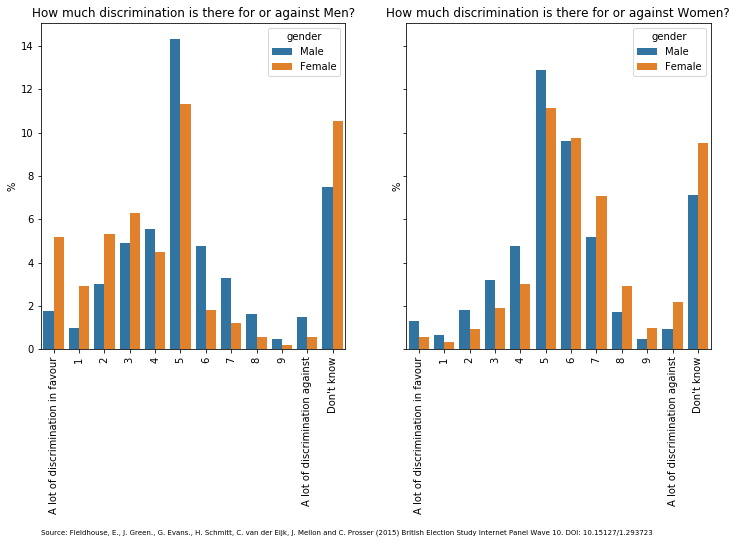

In [555]:
### 
f, ax_arr = plt.subplots(1, 2, sharey=True,figsize=(12,6))

y = 'gender'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]

x_arr = ['discrimMen','discrimWomen']
subj_arr= ["Men","Women"]
for pl in range(0,2):
    ax=ax_arr[pl]
    x = x_arr[pl]
    subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);
    ax.set_title("How much discrimination is there for or against "+subj+"?")
    ax.set_xlabel("")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -180),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + "gendered_discrimination" + ".png"
plt.savefig( fname, bbox_inches='tight' )  

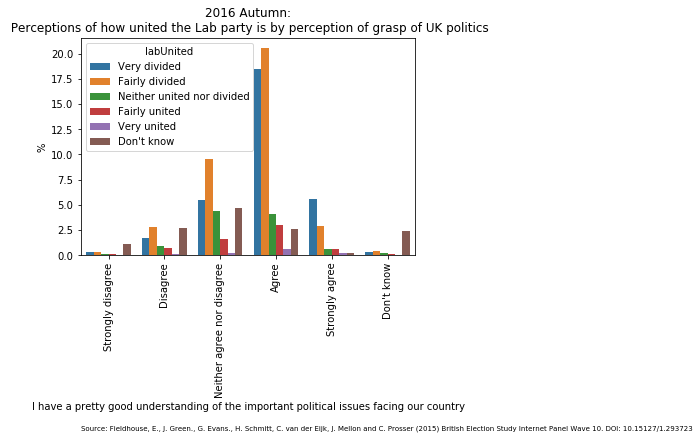

In [575]:
### 
f = plt.figure()

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'labUnited'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
# dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['efficacyUnderstand']
subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
    subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\n Perceptions of how united the Lab party is by perception of grasp of UK politics")
    ax.set_xlabel("I have a pretty good understanding of the important political issues facing our country")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -170),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + "Lab_united_understanding_of_pol" + ".png"
plt.savefig( fname, bbox_inches='tight' )  

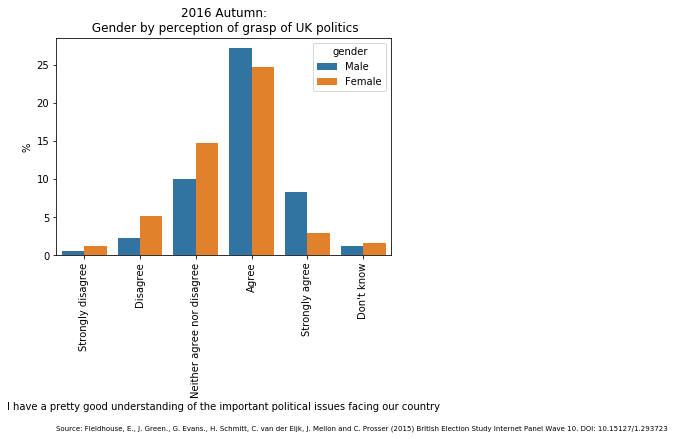

In [576]:
### 
f = plt.figure()

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'gender'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['efficacyUnderstand']
subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
    subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\n Gender by perception of grasp of UK politics")
    ax.set_xlabel("I have a pretty good understanding of the important political issues facing our country")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -170),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + "Gender_understanding_of_pol" + ".png"
plt.savefig( fname, bbox_inches='tight' )  

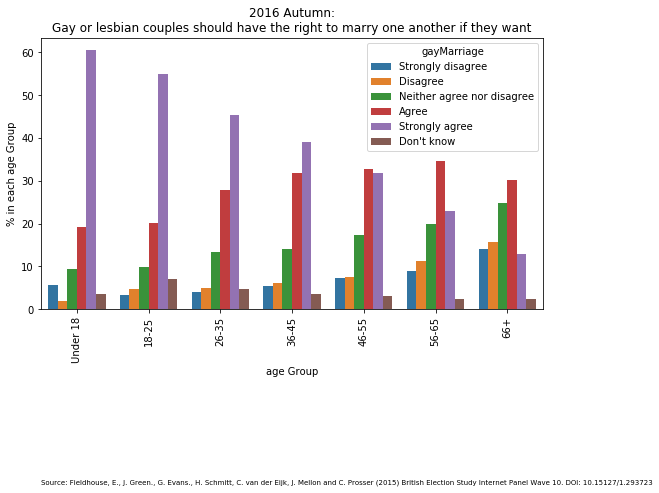

In [590]:
### 
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'gayMarriage'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['ageGroup']
subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
    subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nGay or lesbian couples should have the right to marry one another if they want")
    ax.set_xlabel("age Group")
    ax.set_ylabel("% in each age Group")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -170),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + "gayMarriage_by_ageGroup" + ".png"
plt.savefig( fname, bbox_inches='tight' )  

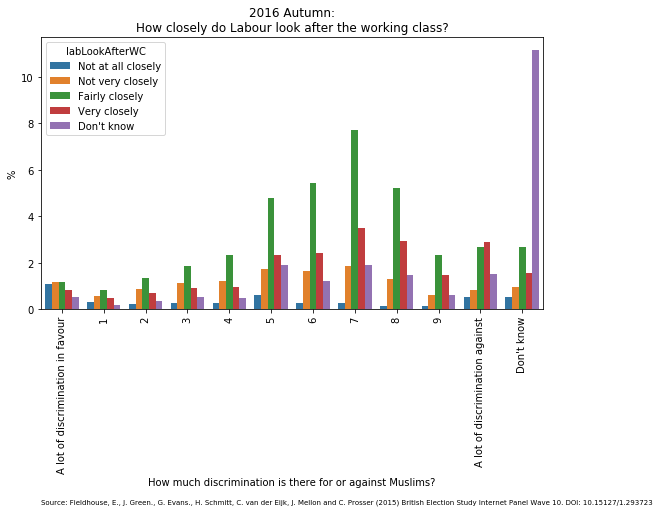

In [596]:
### 
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'labLookAfterWC'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['discrimMuslims']
subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
    subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nHow closely do Labour look after the working class?")
    ax.set_xlabel("How much discrimination is there for or against Muslims?")
    ax.set_ylabel("%")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -190),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

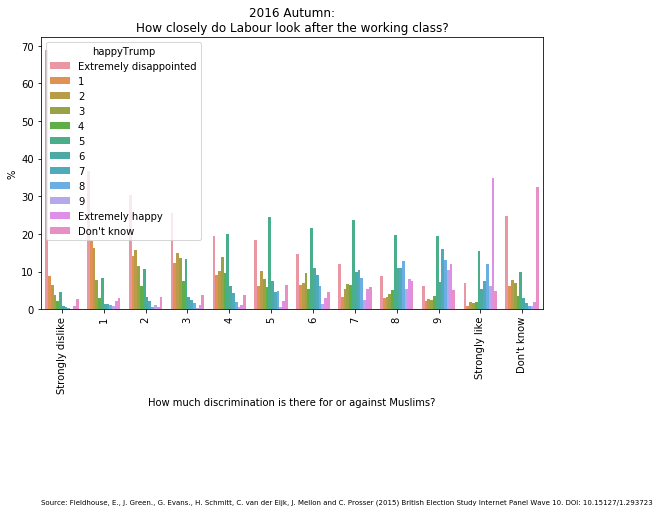

In [601]:
### 
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'happyTrump'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['likeFarage']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
    subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nHow closely do Labour look after the working class?")
    ax.set_xlabel("How much discrimination is there for or against Muslims?")
    ax.set_ylabel("%")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -190),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

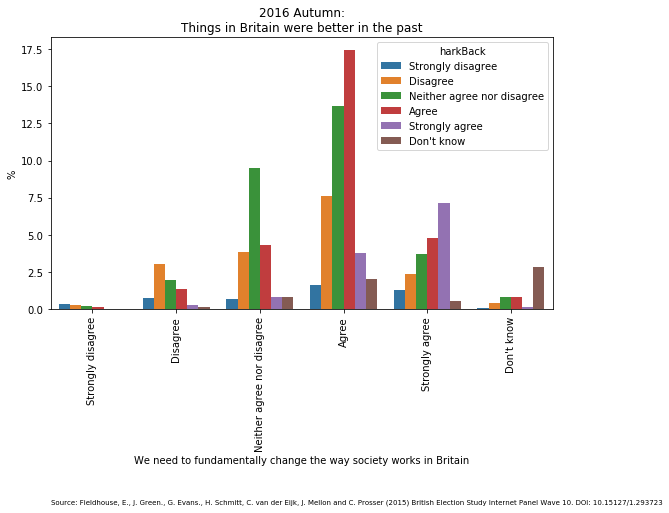

In [607]:
### 
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'harkBack'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['radical']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
    subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nThings in Britain were better in the past")
    ax.set_xlabel("We need to fundamentally change the way society works in Britain")
    ax.set_ylabel("%")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -190),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

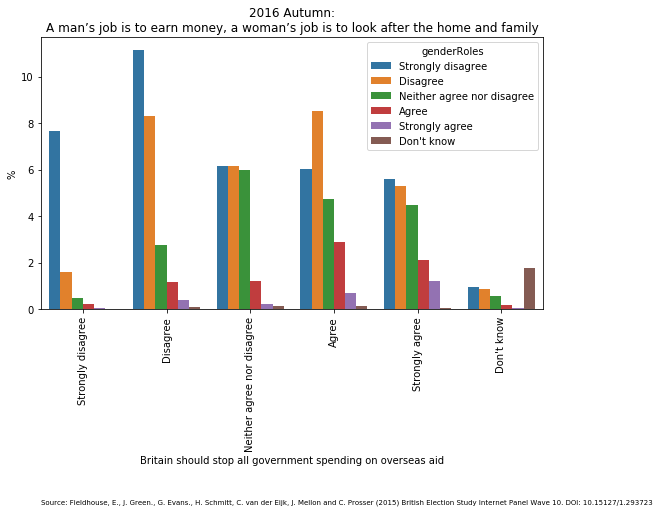

In [624]:
### 
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'genderRoles'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['overseasAid']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nA man’s job is to earn money, a woman’s job is to look after the home and family")
    ax.set_xlabel("Britain should stop all government spending on overseas aid")
    ax.set_ylabel("%")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -190),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

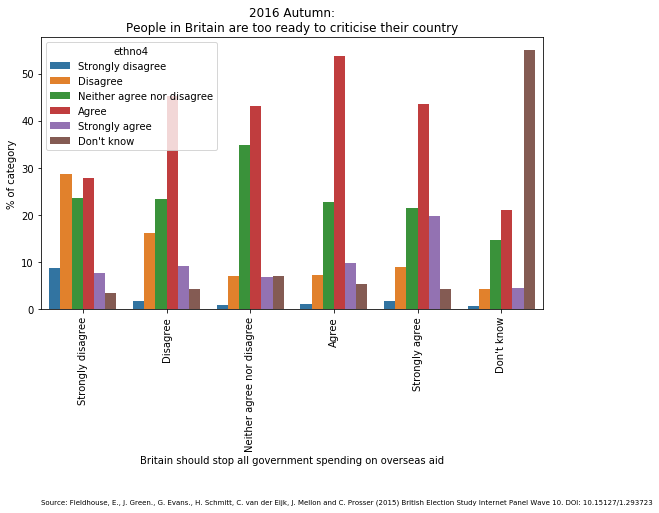

In [630]:
### 
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'ethno4'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['overseasAid']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nPeople in Britain are too ready to criticise their country")
    ax.set_xlabel("Britain should stop all government spending on overseas aid")
    ax.set_ylabel("% of category")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -190),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

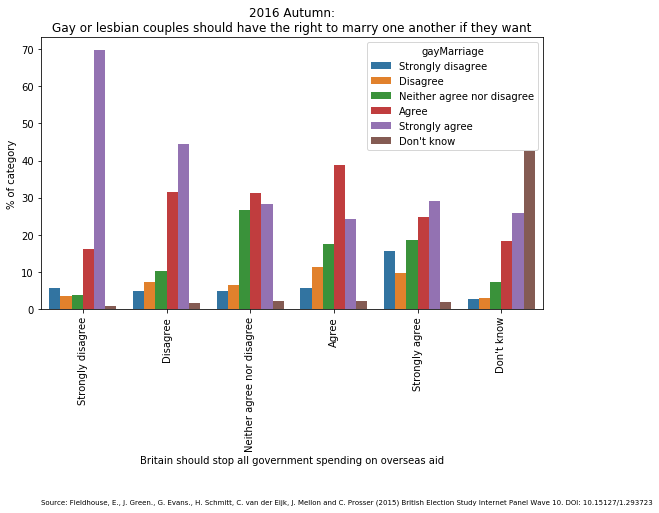

In [634]:
### 
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'gayMarriage'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['overseasAid']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nGay or lesbian couples should have the right to marry one another if they want")
    ax.set_xlabel("Britain should stop all government spending on overseas aid")
    ax.set_ylabel("% of category")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -190),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

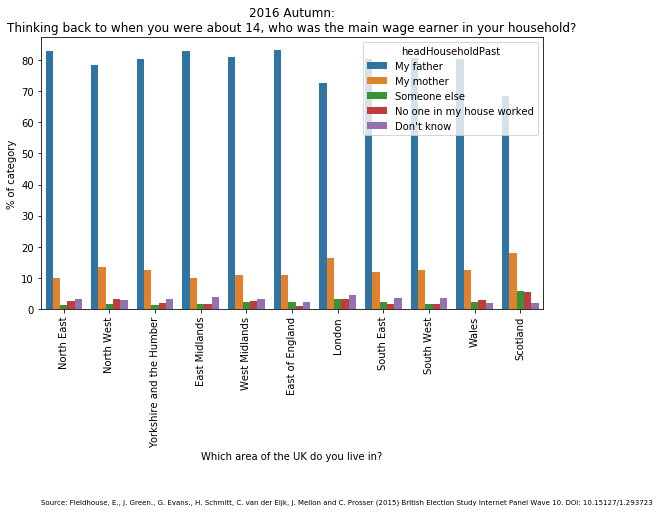

In [11]:
### gor, headHouseholdPast
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'headHouseholdPast'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['gor']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked);

        
    ax.set_title(dataset_description + ":\nThinking back to when you were about 14, who was the main wage earner in your household?")
    ax.set_xlabel("Which area of the UK do you live in?")
    ax.set_ylabel("% of category")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -190),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


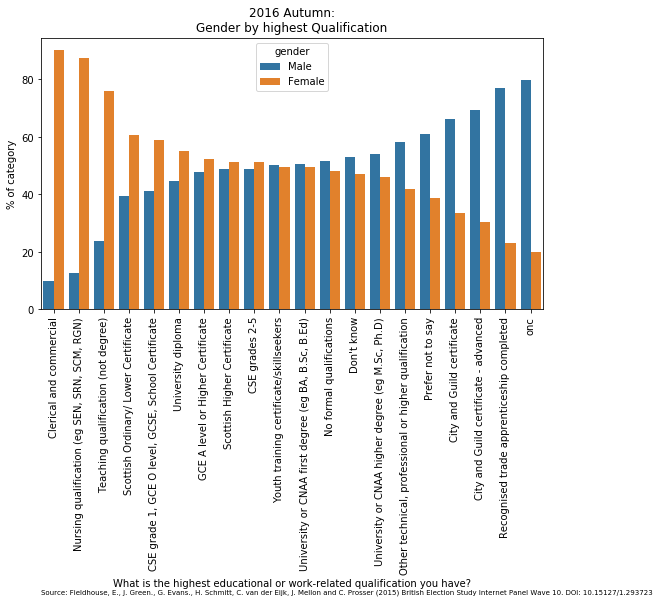

In [27]:
### education, gender
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'gender'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['education']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
    order = stacked.sort_values(by="%")[stacked["gender"]=="Male"]["education"].values
    
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked,order=order);

        
    ax.set_title(dataset_description + ":\nGender by highest Qualification")
    ax.set_xlabel("What is the highest educational or work-related qualification you have?")
    ax.set_ylabel("% of category")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -280),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

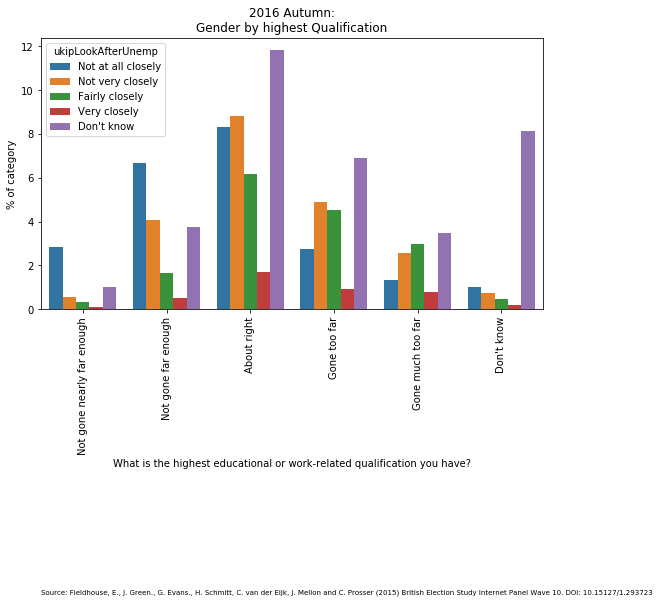

In [31]:
### blackEquality, ukipLookAfterUnemp
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'ukipLookAfterUnemp'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['blackEquality']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
#     order = stacked.sort_values(by="%")[stacked["gender"]=="Male"]["education"].values
    
#     g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked,order=order);
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked)
        
    ax.set_title(dataset_description + ":\nGender by highest Qualification")
    ax.set_xlabel("What is the highest educational or work-related qualification you have?")
    ax.set_ylabel("% of category")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -280),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

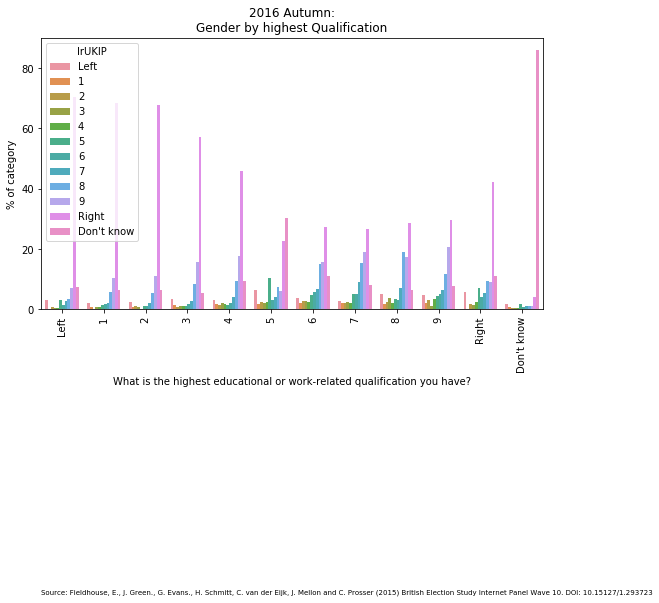

In [33]:
### blackEquality, ukipLookAfterUnemp
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'lrUKIP'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['leftRight']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
#     order = stacked.sort_values(by="%")[stacked["gender"]=="Male"]["education"].values
    
#     g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked,order=order);
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked)
        
    ax.set_title(dataset_description + ":\nGender by highest Qualification")
    ax.set_xlabel("What is the highest educational or work-related qualification you have?")
    ax.set_ylabel("% of category")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -280),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

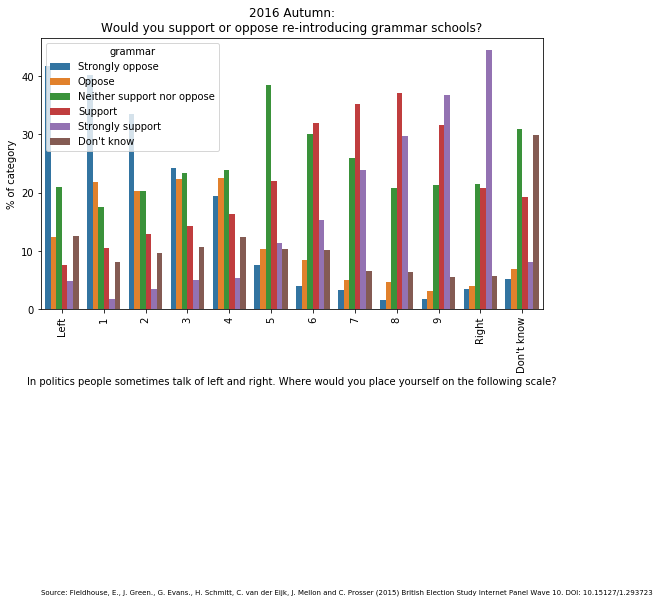

In [35]:
### blackEquality, ukipLookAfterUnemp
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'grammar'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['leftRight']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='index',
                values  = weights,
                aggfunc = sum)   
    
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
#     order = stacked.sort_values(by="%")[stacked["gender"]=="Male"]["education"].values
    
#     g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked,order=order);
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked)
        
    ax.set_title(dataset_description + ":\nWould you support or oppose re-introducing grammar schools?")
    ax.set_xlabel("In politics people sometimes talk of left and right. Where would you place yourself on the following scale?")
    ax.set_ylabel("% of category")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -280),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

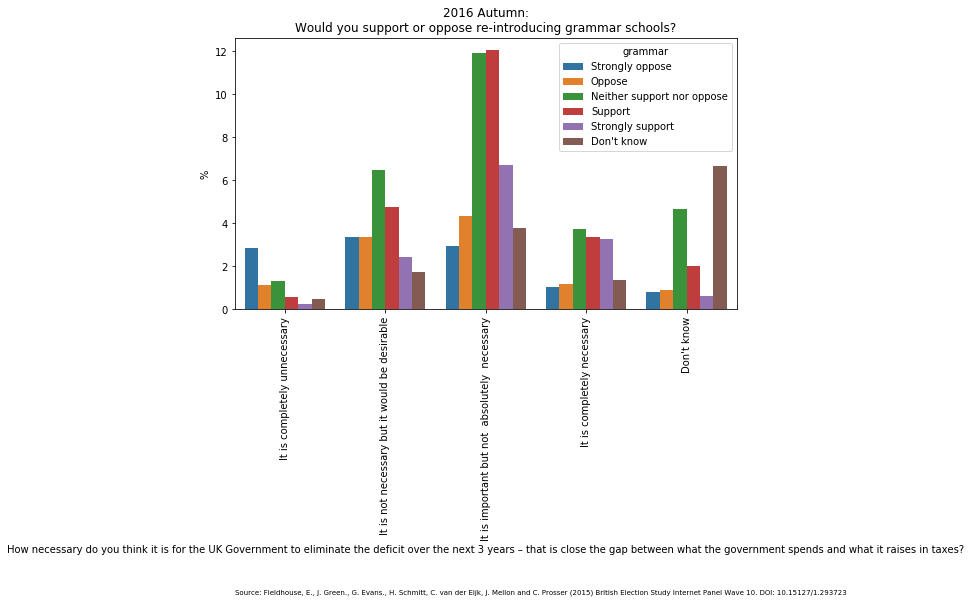

In [38]:
### deficitReduce, grammar
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'grammar'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['deficitReduce']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
#     order = stacked.sort_values(by="%")[stacked["gender"]=="Male"]["education"].values
    
#     g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked,order=order);
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked)
        
    ax.set_title(dataset_description + ":\nWould you support or oppose re-introducing grammar schools?")
    ax.set_xlabel("How necessary do you think it is for the UK Government to eliminate the deficit over the next 3 years – that is close the gap between what the government spends and what it raises in taxes?")
    ax.set_ylabel("%")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -280),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

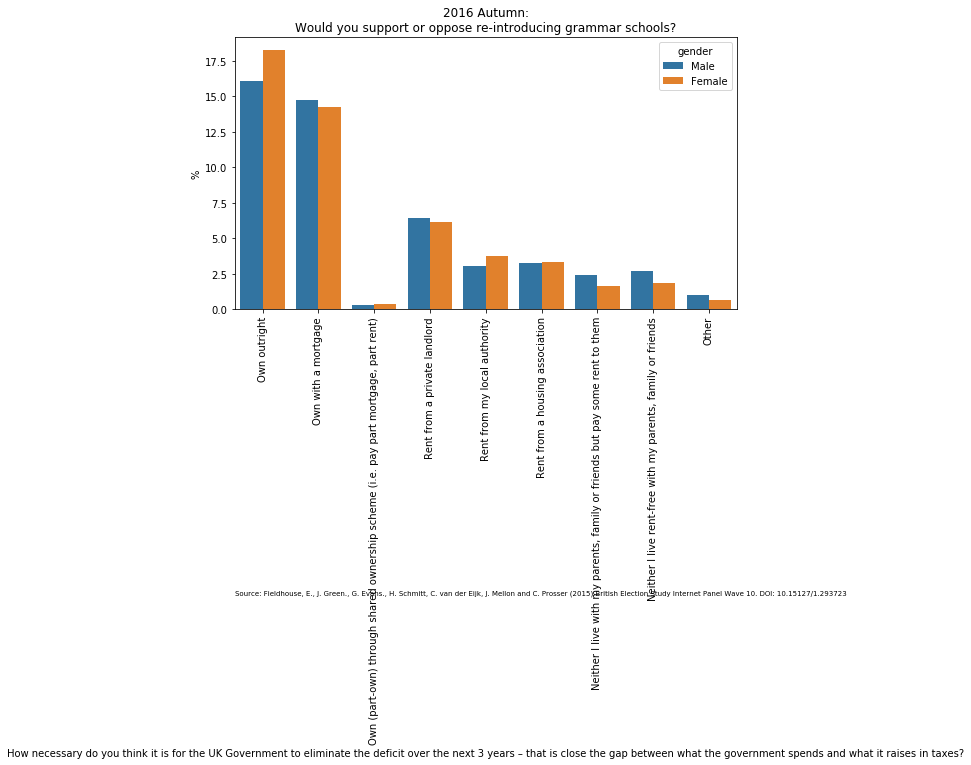

In [39]:
### housing, gender
f = plt.figure(figsize=(9,5))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'gender'
weight_var = 'wt_full_W10'
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['housing']
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize='all',
                values  = weights,
                aggfunc = sum)   
    
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
#     order = stacked.sort_values(by="%")[stacked["gender"]=="Male"]["education"].values
    
#     g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked,order=order);
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked)
        
    ax.set_title(dataset_description + ":\nWould you support or oppose re-introducing grammar schools?")
    ax.set_xlabel("How necessary do you think it is for the UK Government to eliminate the deficit over the next 3 years – that is close the gap between what the government spends and what it raises in taxes?")
    ax.set_ylabel("%")
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -280),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ ".png"
plt.savefig( fname, bbox_inches='tight' )  

In [55]:
# [x for x in BES_Panel.columns if "wt" in x]

['wt_core_W7', 'wt_full_W7', 'wt_full_W1W2W3W4W5W6', 'enviroGrowth']

In [98]:
weight_dict = {"W10_only":"wt_full_W10",
               'W13_only':'wt_new_W13',
               'W7_only':'wt_full_W7'}

normalise = {"index":"%",
             "all":"% of category"}

'../BES_analysis_output/immigSelf_by_leftRight/immigSelf_by_leftRight2016_Pre_Local_Elections%.png'

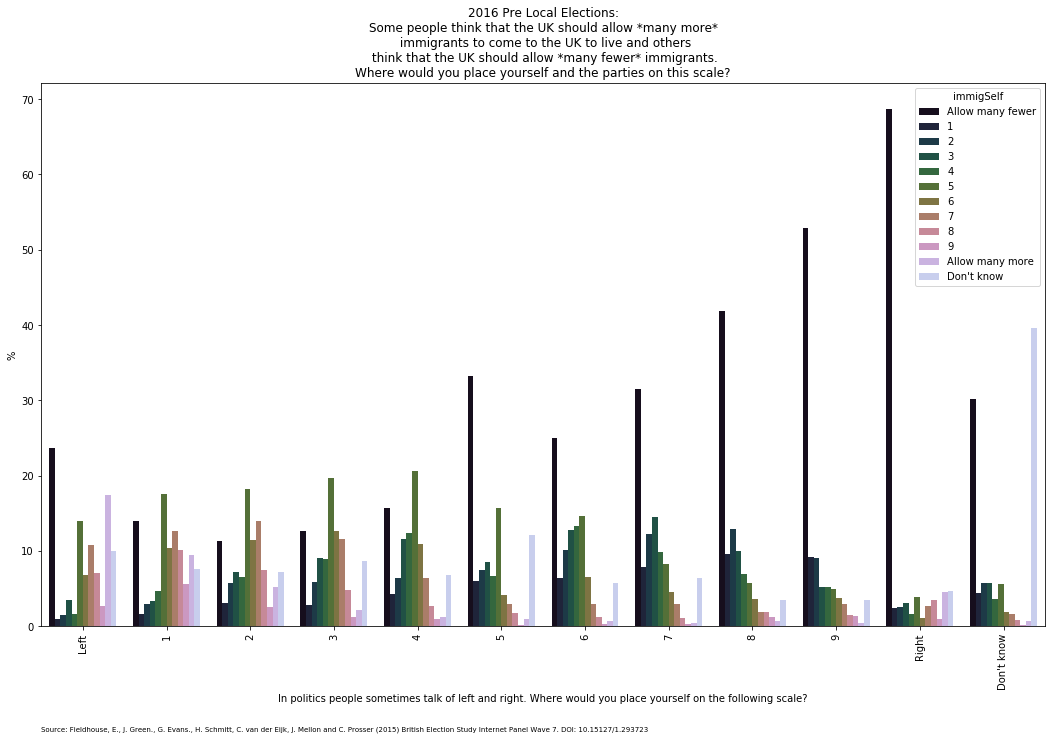

In [91]:
normalise_over = "index"
output_subfolder = "../BES_analysis_output/immigSelf_by_leftRight/"

f = plt.figure(figsize=(18,10))

# plt.subplots(1, 1, sharey=True,figsize=(12,6))
ax_arr = [plt.gca()]
y = 'immigSelf'
weight_var = weight_dict[dataset_name]
weights =   BES_Panel[weight_var]
dataset_description = manifest["Friendlier_Description"].values[0]

x_arr = ['leftRight']
sns.set_palette(sns.color_palette("BrBG", 7)) 
pal = sns.color_palette("cubehelix", 14)
# subj_arr= ["Men"]
for pl in range(0,len(x_arr)):
    ax=ax_arr[pl]
    x = x_arr[pl]
  #  subj = subj_arr[pl]

    crosstab = pd.crosstab(BES_Panel[x],
                BES_Panel[y],
                normalize=normalise_over,
                values  = weights,
                aggfunc = sum)   
    
    stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
    stacked["%"] = stacked["%"]*100
#     order = stacked.sort_values(by="%")[stacked["gender"]=="Male"]["education"].values
    

#     g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked,order=order);
    g = sns.barplot(ax = ax, x=x, y='%', hue=y, data=stacked, palette=pal)
        
    ax.set_title(dataset_description + ":\nSome people think that the UK should allow *many more*\n immigrants to come to the UK to live and others\n think that the UK should allow *many fewer* immigrants.\nWhere would you place yourself and the parties on this scale?")
    ax.set_xlabel("In politics people sometimes talk of left and right. Where would you place yourself on the following scale?")
    ax.set_ylabel(normalise[normalise_over])
    for x in ax.get_xticklabels():
        x.set_rotation(90)
    if pl==0:
        dataset_citation = "Source: " + manifest["Citation"].values[0]
        ax.annotate(dataset_citation, (0,0), (0, -100),
                         xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) 

fname = output_subfolder + y+"_by_" + x_arr[0]+ dataset_description.replace(" ","_").replace(":","_") + normalise[normalise_over].replace(" ","_") + ".png"
plt.savefig( fname, bbox_inches='tight' ) 
display(fname)

In [104]:
y = 'immigSelf'
x = 'leftRight'
weight_var = weight_dict[dataset_name]
weights =   BES_Panel[weight_var]

crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='all',
            values  = weights,
            aggfunc = sum)  

In [119]:
weighted_imm = crosstab.sum()
weighted_imm

immigSelf
Allow many fewer    0.280102
1                   0.038297
2                   0.063146
3                   0.081653
4                   0.071827
5                   0.151591
6                   0.049907
7                   0.047801
8                   0.018701
9                   0.006978
Allow many more     0.027810
Don't know          0.162186
dtype: float64

In [133]:
weighted_imm_simpler_cats = pd.DataFrame(columns = ["%"])
weighted_imm_simpler_cats.loc["Less"] = weighted_imm[weighted_imm.index[0:5]].sum()


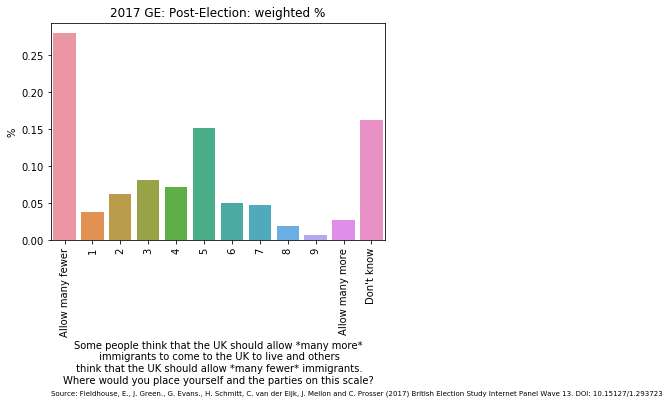

In [128]:

sns.barplot(x= weighted_imm.index, y=weighted_imm.values);
ax = plt.gca()

ax.set_title(dataset_description + ": weighted %")
ax.set_xlabel("Some people think that the UK should allow *many more*\n immigrants to come to the UK to live and others\n think that the UK should allow *many fewer* immigrants.\nWhere would you place yourself and the parties on this scale?")
ax.set_ylabel(normalise[normalise_over])
for x in ax.get_xticklabels():
    x.set_rotation(90)
dataset_citation = "Source: " + manifest["Citation"].values[0]
ax.annotate(dataset_citation, (0,0), (0, -150),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)


In [264]:
[x for x in BES_reduced.columns if "general" in x.lower()]

['expectGoodConductGeneral__Expect 20xx election to be conducted unfairly',
 'generalElectionVote_Labour',
 'generalElectionVote_Liberal Democrat',
 'generalElectionVote_Scottish National Party (SNP)',
 'generalElectionVote_United Kingdom Independence Party (UKIP)',
 'generalElectionVote_Green Party',
 'generalElectionVote_Plaid Cymru']

In [498]:
# BES_reduced.corrwith(BES_reduced['euRefVote_Leave the EU']).sort_values()
# BES_Panel['generalElectionVote']=="Conservative"

In [497]:
x = 'pano'
# x = new_old_col_names[x]
y = 'euRefVote_Leave the EU'
y = new_old_col_names[y]
# party_filter = BES_reduced['generalElectionVote_Labour'].astype('bool')
party_filter= BES_Panel['generalElectionVote']=="Conservative"

weights =   BES_Panel['wt_new_W13'][party_filter]
    
crosstab = pd.crosstab(BES_Panel[x][party_filter],
            BES_Panel[y][party_filter],
            normalize='index',
            values  = weights,
            aggfunc = sum)   
stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
# stacked
# sns.barplot(x=x, y='value', hue=y, data=stacked);
# plt.xticks(rotation=90)

In [475]:
Remain = stacked[stacked["euRefVote"]=="Stay/remain in the EU"][["value","pano"]]
Leave  = stacked[stacked["euRefVote"]=="Leave the EU"][["value","pano"]]
# Remain_minus_Leave = Remain-Leave
# Remain_mins_Leave.index = pano_to_pcon.loc[Remain_mins_Leave.index]
# .values -  stacked[stacked["euRefVote"]=="Leave the EU"]["value"].values
Remain["pano"] = pano_to_pcon.loc[Remain["pano"]]["pcon"].values
Remain["pano"] = Remain["pano"].apply(lambda x: x.lower())
Leave["pano"]  = pano_to_pcon.loc[Leave["pano"]]["pcon"].values
Leave["pano"]  = Leave["pano"].apply(lambda x: x.lower())

Remain = Remain.set_index("pano")
Leave  = Leave.set_index("pano")

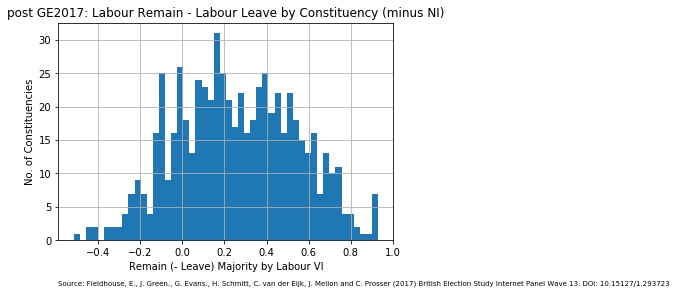

In [448]:
(Remain - Leave).sort_values(by="value").hist(bins=50)

title = "post GE2017: Labour Remain - Labour Leave by Constituency (minus NI)"
name = "post GE2017_Lab_Remain_minus_Leave"

# GE_2017_short["majority_as_%"] = GE_results_2017["majority"]/GE_results_2017["valid_votes"]
# GE_2017_short["majority_as_%"].hist(bins=32);
# what would you count as "marginal"? <15% majority? (only looking at % of valid votes)
# plt.axvline(x=.15, color='r');
# plt.axvline(x=.05, color='g');
plt.title(title);
plt.xlabel("Remain (- Leave) Majority by Labour VI");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + manifest["Citation"].values[0]
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )

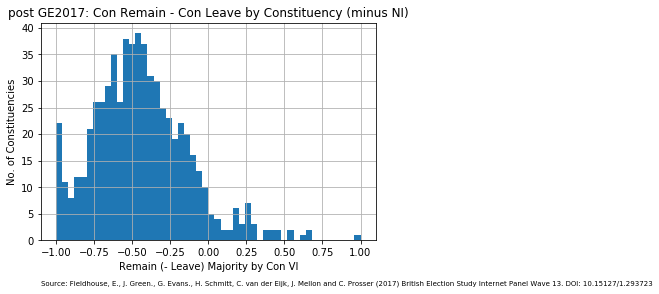

In [477]:
(Remain - Leave).sort_values(by="value").hist(bins=50)

title = "post GE2017: Con Remain - Con Leave by Constituency (minus NI)"
name = "post GE2017_Con_Remain_minus_Leave"

# GE_2017_short["majority_as_%"] = GE_results_2017["majority"]/GE_results_2017["valid_votes"]
# GE_2017_short["majority_as_%"].hist(bins=32);
# what would you count as "marginal"? <15% majority? (only looking at % of valid votes)
# plt.axvline(x=.15, color='r');
# plt.axvline(x=.05, color='g');
plt.title(title);
plt.xlabel("Remain (- Leave) Majority by Con VI");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + manifest["Citation"].values[0]
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )

In [495]:
# (Remain - Leave).sort_values(by="value")

In [255]:
# no missing values and all correlate highly eith eurefvote (except likeCorbyn)
# euRefVote_Leave the EU 
# euPriorityBalance__Control immigration                             0.632976
# EUIntegrationSelf__Protect our independence                        0.766333
# euRefDoOver_Yes
# likeCorbyn__Strongly like

In [485]:
marginals_2017_subfolder = BES_output_folder + os.sep + "GE 2017 Marginal Seats & euRef" + os.sep
if not os.path.exists( marginals_2017_subfolder ):
    os.makedirs( marginals_2017_subfolder )

In [249]:
# BES_Panel[["pano","pcon"]].drop_duplicates().set_index('pano').to_csv(BES_small_data_files+"pano_to_pcon.csv", encoding=encoding)
pano_to_pcon = pd.read_csv(BES_small_data_files+"pano_to_pcon.csv", encoding=encoding).set_index('pano')

In [450]:
GE_results_2017 = pd.read_csv(BES_small_data_files+"HoC-GE2017-constituency-results.csv", encoding=encoding)
GE_2017_short = GE_results_2017[["constituency_name","first_party","second_party","valid_votes","majority"]]
GE_2017_short["constituency_name"] = GE_2017_short["constituency_name"].apply(lambda x: x.lower())

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


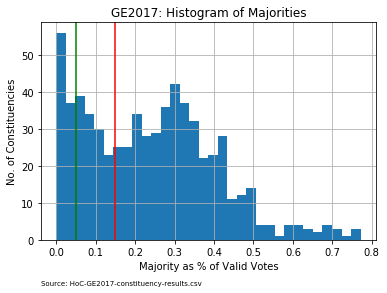

In [451]:
title = "GE2017: Histogram of Majorities"
name = "GE2017_Histogram_of_Majorities"

GE_2017_short["majority_as_%"] = GE_results_2017["majority"]/GE_results_2017["valid_votes"]
GE_2017_short["majority_as_%"].hist(bins=32);
# what would you count as "marginal"? <15% majority? (only looking at % of valid votes)
plt.axvline(x=.15, color='r');
plt.axvline(x=.05, color='g');
plt.title(title);
plt.xlabel("Majority as % of Valid Votes");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + "HoC-GE2017-constituency-results.csv"
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )

In [452]:
ordered_list = list( GE_2017_short[ GE_2017_short["majority_as_%"]<.15 ]["first_party"].value_counts().index )

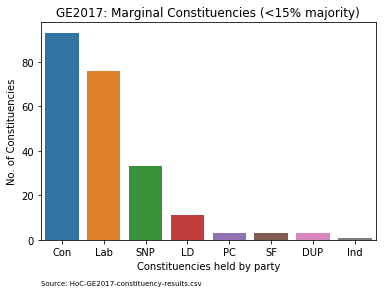

In [453]:
title = "GE2017: Marginal Constituencies (<15% majority)"
name = "GE2017_Marginal_Constituencies"

g=sns.countplot(GE_2017_short[ GE_2017_short["majority_as_%"]<.15 ]["first_party"], order=ordered_list);
plt.title(title);
plt.xlabel("Constituencies held by party");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + "HoC-GE2017-constituency-results.csv"
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )

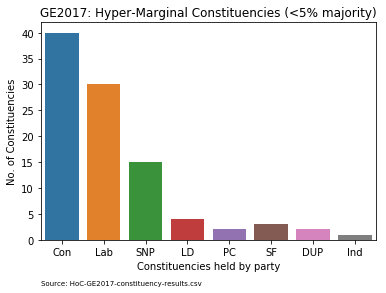

In [454]:
title = "GE2017: Hyper-Marginal Constituencies (<5% majority)"
name = "GE2017_Hyper-Marginal_Constituencies"

g=sns.countplot(GE_2017_short[ GE_2017_short["majority_as_%"]<.05 ]["first_party"], order=ordered_list);
plt.title(title);
plt.xlabel("Constituencies held by party");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + "HoC-GE2017-constituency-results.csv"
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )

{'aberconwy',
 'aberdeen south',
 'airdrie and shotts',
 'alyn and deeside',
 'angus',
 'arfon',
 'argyll and bute',
 'ashfield',
 'ayr, carrick and cumnock',
 'banff and buchan',
 'barrow and furness',
 'bassetlaw',
 'battersea',
 'bedford',
 'birmingham, northfield',
 'bishop auckland',
 'blackpool north and cleveleys',
 'blackpool south',
 'bolsover',
 'bolton north east',
 'bolton west',
 'bridgend',
 'bristol north west',
 'broxtowe',
 'bury north',
 'bury south',
 'caithness, sutherland and easter ross',
 'calder valley',
 'camborne and redruth',
 'canterbury',
 'cardiff north',
 'carlisle',
 'carmarthen east and dinefwr',
 'carmarthen west and south pembrokeshire',
 'carshalton and wallington',
 'central ayrshire',
 'ceredigion',
 'cheadle',
 'cheltenham',
 'chingford and woodford green',
 'chipping barnet',
 'chorley',
 'clwyd south',
 'clwyd west',
 'coatbridge, chryston and bellshill',
 'colchester',
 'colne valley',
 'copeland',
 'corby',
 'crawley',
 'crewe and nantwich',
 

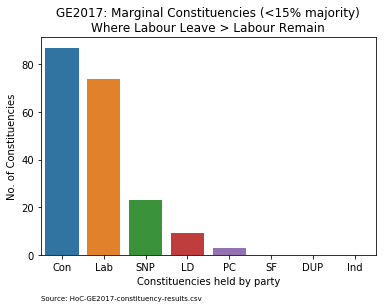

In [488]:
marginal_cons = GE_2017_short[GE_2017_short["majority_as_%"]<.15]["constituency_name"].values
Labour_Leave_Majority = (Remain - Leave)[(Remain - Leave)["value"]<0].index
overlap_cons = set(marginal_cons).intersection( set(Labour_Leave_Majority))
const_filter = GE_2017_short["constituency_name"].apply(lambda x: x in overlap_cons)


title = "GE2017: Marginal Constituencies (<15% majority)\nWhere Labour Leave > Labour Remain"
name = "GE2017_Marginal_Constituencies_Where_Labour_Leave_gt_Labour_Remain"

g=sns.countplot(GE_2017_short[ const_filter ]["first_party"], order=ordered_list);
plt.title(title);
plt.xlabel("Constituencies held by party");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + "HoC-GE2017-constituency-results.csv"
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )
display(overlap_cons)

{'aberconwy',
 'airdrie and shotts',
 'arfon',
 'argyll and bute',
 'ashfield',
 'barrow and furness',
 'battersea',
 'bedford',
 'bishop auckland',
 'blackpool north and cleveleys',
 'bolton west',
 'broxtowe',
 'calder valley',
 'camborne and redruth',
 'canterbury',
 'carshalton and wallington',
 'central ayrshire',
 'ceredigion',
 'cheltenham',
 'chipping barnet',
 'coatbridge, chryston and bellshill',
 'colne valley',
 'copeland',
 'corby',
 'crawley',
 'crewe and nantwich',
 'derby north',
 'dudley north',
 'dunfermline and west fife',
 'eastbourne',
 'edinburgh south west',
 'finchley and golders green',
 'glasgow east',
 'glasgow north',
 'glasgow south',
 'gordon',
 'harrow east',
 'hastings and rye',
 'hendon',
 'high peak',
 'inverclyde',
 'ipswich',
 'keighley',
 'kensington',
 'kirkcaldy and cowdenbeath',
 'lanark and hamilton east',
 'lincoln',
 'mansfield',
 'middlesbrough south and east cleveland',
 'midlothian',
 'milton keynes north',
 'milton keynes south',
 'morley 

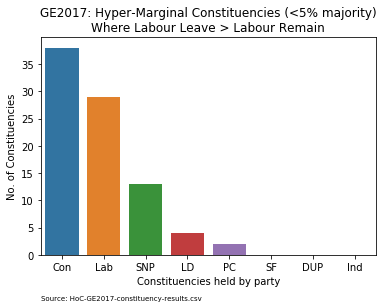

In [489]:
marginal_cons = GE_2017_short[GE_2017_short["majority_as_%"]<.05]["constituency_name"].values
Labour_Leave_Majority = (Remain - Leave)[(Remain - Leave)["value"]<0].index
overlap_cons = set(marginal_cons).intersection( set(Labour_Leave_Majority))
const_filter = GE_2017_short["constituency_name"].apply(lambda x: x in overlap_cons)


title = "GE2017: Hyper-Marginal Constituencies (<5% majority)\nWhere Labour Leave > Labour Remain"
name = "GE2017_Hyper-Marginal_Constituencies_Where_Labour_Leave_gt_Labour_Remain"

g=sns.countplot(GE_2017_short[ const_filter ]["first_party"], order=ordered_list);
plt.title(title);
plt.xlabel("Constituencies held by party");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + "HoC-GE2017-constituency-results.csv"
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )
display(overlap_cons)

{'aberdeen north',
 'altrincham and sale west',
 'bath',
 'cities of london and westminster',
 'dundee west',
 'east dunbartonshire',
 'east kilbride, strathaven and lesmahagow',
 'east renfrewshire',
 'edinburgh north and leith',
 'falkirk',
 'filton and bradley stoke',
 'glasgow north east',
 'glasgow north west',
 'glasgow south west',
 'glenrothes',
 'morecambe and lunesdale',
 'paisley and renfrewshire south',
 'putney',
 'stoke-on-trent central',
 'west dunbartonshire'}

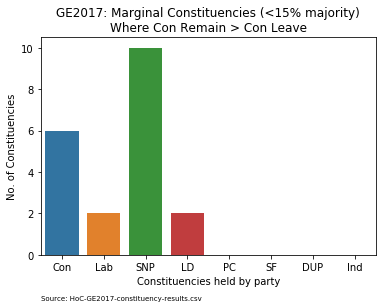

In [493]:
marginal_cons = GE_2017_short[GE_2017_short["majority_as_%"]<.15]["constituency_name"].values
Con_Remain_Majority = (Leave-Remain)[(Leave-Remain)["value"]<0].index
overlap_cons = set(marginal_cons).intersection( set(Con_Remain_Majority))
const_filter = GE_2017_short["constituency_name"].apply(lambda x: x in overlap_cons)


title = "GE2017: Marginal Constituencies (<15% majority)\nWhere Con Remain > Con Leave"
name = "GE2017_Marginal_Constituencies_Where_Con_Remain_gt_Con_Leave"

g=sns.countplot(GE_2017_short[ const_filter ]["first_party"], order=ordered_list);
plt.title(title);
plt.xlabel("Constituencies held by party");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + "HoC-GE2017-constituency-results.csv"
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )
display(overlap_cons)

{'edinburgh north and leith',
 'glasgow north east',
 'glasgow south west',
 'morecambe and lunesdale',
 'putney'}

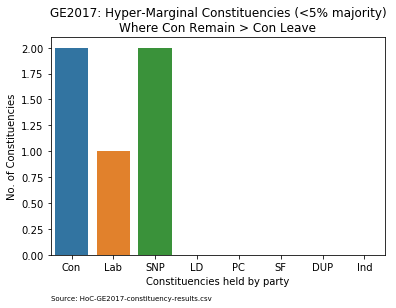

In [494]:
marginal_cons = GE_2017_short[GE_2017_short["majority_as_%"]<.05]["constituency_name"].values
Con_Remain_Majority = (Leave-Remain)[(Leave-Remain)["value"]<0].index
overlap_cons = set(marginal_cons).intersection( set(Con_Remain_Majority))
const_filter = GE_2017_short["constituency_name"].apply(lambda x: x in overlap_cons)


title = "GE2017: Hyper-Marginal Constituencies (<5% majority)\nWhere Con Remain > Con Leave"
name = "GE2017_Hyper-Marginal_Constituencies_Where_Con_Remain_gt_Con_Leave"

g=sns.countplot(GE_2017_short[ const_filter ]["first_party"], order=ordered_list);
plt.title(title);
plt.xlabel("Constituencies held by party");
plt.ylabel("No. of Constituencies");

ax = plt.gca()
dataset_citation = "Source: " + "HoC-GE2017-constituency-results.csv"
ax.annotate(dataset_citation, (0,0), (0, -40),
                 xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7)  
fname = marginals_2017_subfolder + name + ".png"
plt.savefig( fname, bbox_inches='tight' )
display(overlap_cons)